In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pingouin as pg

#df_anno = pd.read_feather("anno.feather")
df_anno = pd.read_feather("anno_JAM_TEST.feather")

<Axes: >

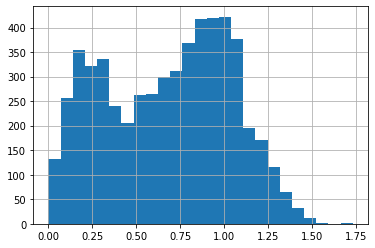

In [39]:
df_anno['marker_sum_norm_label'].hist(bins = 25)

In [3]:
np.unique(df_anno['virus_label'])

array(['', '0', 'CN1390', 'CN1457', 'CN1633', 'CN1816', 'CN1818',
       'CN1827', 'CN1954', 'CN1955', 'CN2039', 'CN2360', 'CN2365',
       'CN2374', 'CN2379', 'CN2602', 'CN3556', 'CN3583', 'CN3596', 'None',
       'ZZ_Missing'], dtype=object)

In [4]:
df_anno[df_anno['virus_label']=='CN1390']['subclass_label'].value_counts()

SST                 126
PVALB                89
LAMP5/PAX6/Other     31
VIP                  12
Chandelier            8
Sst Chodl             5
L4 IT                 4
L6 CT                 4
L6 IT                 3
L5/6 NP               3
L6b                   2
L5 IT                 1
Name: subclass_label, dtype: int64

In [52]:
df_anno[np.array(df_anno.subclass_label == "L4 IT") & np.array(df_anno.roi_label == "MTG_L4")]['cell_name_label']
# None of these are in EphysROIResults yet

5412    H200.1030.CX10.02.199
5414    H200.1030.CX10.02.263
5419    H200.1030.CX10.02.356
5421    H200.1030.CX10.02.363
5424    H200.1030.CX10.02.530
5425    H200.1030.CX10.02.541
5426    H200.1030.CX10.02.067
Name: cell_name_label, dtype: object

In [53]:
df_anno[np.array(df_anno.subclass_label == "L4 IT") & np.array(df_anno.roi_label == "FCx_L4")]['cell_name_label']

# H19.03.310.11.05.01.06 is present

980     H19.03.310.11.05.01.06
982     H19.03.312.11.05.01.03
994     H19.03.310.11.06.02.03
995     H19.03.310.11.06.02.05
1033    H19.03.310.11.06.01.04
1090    H19.03.310.11.04.01.05
1120    H19.03.309.11.08.02.02
1137    H19.03.309.11.11.01.03
1144    H21.26.406.11.51.01.02
1149    H21.26.406.11.51.01.03
1152    H19.03.312.11.01.01.03
1153    H21.26.406.11.51.01.01
1157    H19.03.309.11.10.01.04
1163    H19.03.312.11.04.01.01
1863       H17.06.016.11.12.02
1864       H18.06.001.11.11.04
2220    H19.03.310.11.05.01.05
2224    H19.03.309.11.10.01.03
2228       H19.29.163.11.11.02
2292    H19.03.309.11.10.02.01
2295    H18.06.359.11.03.01.04
2318       H19.28.022.11.06.05
3235    H17.03.015.21.15.01.05
3368       H20.28.002.11.05.01
4041       H18.03.009.11.14.04
Name: cell_name_label, dtype: object

In [47]:
np.unique(df_anno.roi_label)

array(['CB', 'CBNA', 'CBX_mo', 'CCx_L_L5', 'CCx_L_L6', 'FCx_L1', 'FCx_L2',
       'FCx_L3', 'FCx_L3a', 'FCx_L3b', 'FCx_L3c', 'FCx_L4', 'FCx_L5',
       'FCx_L6', 'FCx_LL1', 'FCx_LL2', 'FCx_LL3', 'FCx_LL4', 'FCx_LL5',
       'FCx_LL6', 'FCx_L_L2', 'FCx_L_L3', 'FCx_L_L4', 'FCx_L_L5',
       'FCx_L_L6', 'HIPCA1', 'HIPbCA1', 'HIPbCA2', 'HIPbCA3', 'HIPbDG',
       'HIPb_CA2', 'ICx_L_L5', 'MOp_L2-3', 'MOp_L3', 'MOp_L5',
       'MOp_L_L2-3', 'MTG_L1', 'MTG_L2', 'MTG_L3', 'MTG_L4', 'MTG_L5',
       'MTG_L6', 'OCx_L1', 'OCx_L2', 'OCx_L3', 'OCx_L3a', 'OCx_L3b',
       'OCx_L3c', 'OCx_L4', 'OCx_L5', 'OCx_LL1', 'OCx_LL2', 'OCx_LL3',
       'OCx_LL4', 'PCx_L1', 'PCx_L2', 'PCx_L3', 'PCx_L3a', 'PCx_L3b',
       'PCx_L3c', 'PCx_L4', 'PCx_L5', 'PCx_L6', 'PCx_LL1', 'PCx_LL2',
       'PCx_LL3', 'PCx_LL4', 'PCx_LL5', 'PCx_L_L3', 'PCx_L_L3c',
       'PCx_L_L4', 'PCx_L_L5', 'PCx_L_L6', 'STRdCP', 'STRdCa', 'STRdPu',
       'STRd_Ca', 'STRd_Pu', 'STRvACB', 'TCx_L', 'TCx_L1', 'TCx_L2',
       'TCx_L2-3', 'TCx_

datetime.datetime(2022, 12, 6, 0, 0)

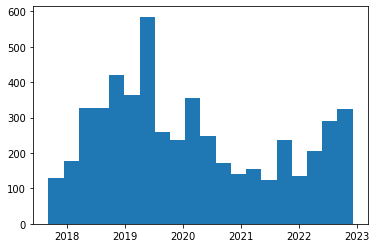

In [5]:
from datetime import datetime
import re
import matplotlib.dates as mdates
patch_dates = [str[0:10] for str in df_anno['patch_date_label']]

patch_dates_sub = [str for str in patch_dates if str!='ZZ_Missing']
patch_dates_sub = [str for str in patch_dates if '-' in str]
#patch_dates_sub = [str for str in patch_dates_sub if re.search(str, '-')]
#patch_dates_sub = [str for str in patch_dates_sub if str!='']

dates = []
for date in patch_dates_sub:
    try:
        dates.append(datetime.strptime(date, '%Y-%m-%d'))
    except:
        dates.append(datetime.strptime(date, '%y-%m-%d'))
#dates = [datetime.strptime(date, '%Y-%m-%d') for date in patch_dates_sub]

plt.hist(dates,bins = 20)
max(dates)

In [6]:
np.array(patch_dates)!='ZZ_Missing'

array([ True,  True,  True, ..., False, False, False])

In [7]:
df_anno.columns.values

array(['exp_component_name_id', 'exp_component_name_label',
       'exp_component_name_color', 'layer_id', 'layer_label',
       'layer_color', 'batch_id', 'batch_label', 'batch_color',
       'cell_name_id', 'cell_name_label', 'cell_name_color', 'spec_id_id',
       'spec_id_label', 'spec_id_color', 'donor_id', 'donor_label',
       'donor_color', 'collaborator_id', 'collaborator_label',
       'collaborator_color', 'gender_id', 'gender_label', 'gender_color',
       'collection_id', 'collection_label', 'collection_color',
       'medical_conditions_id', 'medical_conditions_label',
       'medical_conditions_color', 'postPatch_id', 'postPatch_label',
       'postPatch_color', 'postPatch_classification_id',
       'postPatch_classification_label', 'postPatch_classification_color',
       'filldate_id', 'filldate_label', 'filldate_color',
       'rigOperator_id', 'rigOperator_label', 'rigOperator_color',
       'rigNumber_id', 'rigNumber_label', 'rigNumber_color',
       'cell_depth_id'

In [8]:
df_anno.cell_name_label

0       H19.06.351.11.16.01.01
1       H19.06.351.11.16.01.03
2          H17.03.016.11.16.02
3       H19.06.351.11.16.02.06
4       H19.03.312.11.05.01.01
                 ...          
5574     H200.1030.CX10.06.458
5575     H200.1030.CX10.06.677
5576     H200.1030.CX10.06.812
5577     H200.1030.CX10.06.828
5578        H16.06.009.002.133
Name: cell_name_label, Length: 5579, dtype: object

In [9]:
df_anno.cell_name_id

0       2211
1       2212
2        104
3       2224
4       1886
        ... 
5574    4038
5575    4039
5576    4040
5577    4041
5578      23
Name: cell_name_id, Length: 5579, dtype: int32

In [10]:
df_ephys = pd.read_csv("snakemake_ephys/Human_ephys_features.csv")

In [11]:
df_ephys

,cell_name,blowout_mv_qc,electrode_0_pa_qc,recording_date_qc,seal_gohm_qc,input_resistance_mohm_qc,initial_access_resistance_mohm_qc,input_access_resistance_ratio_qc,fail_tags_qc,failed_blowout,...,peak_deltav_ramp,peak_ratio_chirp,peak_freq_chirp,3db_freq_chirp,peak_impedance_chirp,low_freq_impedance_chirp,sync_freq_chirp,phase_peak_chirp,phase_low_chirp,total_inductive_phase_chirp
0,1216190688,NaN,-28.166876,2022-10-07 01:39:16,2.062001,54.049500,6.201563,0.114739,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,685821031,NaN,73.722504,2018-04-18 06:13:27,1.498305,508.300256,8.984607,0.017676,NaN,False,...,88.031254,1.024661,1.000400,9.303721,0.319072,0.311393,0.400160,-0.093382,0.001045,0.000105
2,768857541,NaN,-17.188749,2018-10-25 23:43:15,2.987128,116.592264,10.590369,0.090833,NaN,False,...,80.885939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1027257544,NaN,48.111252,2020-06-02 00:06:21,2.120645,220.395920,10.664127,0.048386,NaN,False,...,47.795835,1.032767,1.900566,5.851744,0.298725,0.289248,0.600179,-0.247775,0.044893,0.001179
4,1216879626,NaN,6.715000,2022-10-10 23:06:22,2.698770,506.166688,8.311236,0.016420,NaN,False,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3679,835596603,NaN,-21.753750,2019-03-11 21:00:49,1.322570,528.508128,12.157125,0.023003,NaN,False,...,80.472919,1.020596,1.550462,8.102415,0.481901,0.472176,0.750224,-0.131442,0.053782,0.001356
3680,1030496341,NaN,0.032500,2020-06-17 19:07:27,3.598487,554.526528,9.733315,0.017552,NaN,False,...,73.952085,1.002711,0.400119,3.250969,0.572866,0.571317,0.400119,-0.124863,-0.124863,0.000000
3681,700835777,NaN,84.870003,2018-05-22 23:50:34,2.392445,116.194728,11.817028,0.101700,NaN,False,...,55.968750,1.001094,0.400119,13.804114,0.147218,0.147057,0.400119,-0.024377,-0.024377,0.000000
3682,832565636,NaN,-59.684376,2019-03-05 22:53:42,1.738198,302.473888,19.322564,0.063882,NaN,False,...,66.879168,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [12]:
df_ephys.columns.values

array(['cell_name', 'blowout_mv_qc', 'electrode_0_pa_qc',
       'recording_date_qc', 'seal_gohm_qc', 'input_resistance_mohm_qc',
       'initial_access_resistance_mohm_qc',
       'input_access_resistance_ratio_qc', 'fail_tags_qc',
       'failed_blowout', 'failed_electrode_0', 'failed_seal',
       'failed_input_access_resistance', 'failed_qc',
       'failed_fx_long_squares', 'failed_fx_short_squares',
       'failed_fx_ramps', 'failed_fx_chirps', 'failed_fx_sweep_features',
       'upstroke_downstroke_ratio_short_square',
       'threshold_v_short_square', 'width_short_square',
       'upstroke_short_square', 'downstroke_short_square',
       'width_suprathresh_short_square', 'peak_deltav_short_square',
       'sag', 'sag_area', 'sag_tau', 'v_baseline', 'rheobase_i',
       'fi_fit_slope', 'vm_for_sag', 'input_resistance',
       'input_resistance_ss', 'tau', 'latency_rheo', 'avg_rate_rheo',
       'mean_isi_rheo', 'upstroke_downstroke_ratio_rheo',
       'threshold_v_rheo', 'peak_

In [13]:
df_id = pd.read_csv("custom_report.csv")

In [14]:
df_id


,project,cell_specimen_id,link_cell_specimen,cell_specimen_name,cell_or_cluster,hemisphere,flipped,link_slice_specimen,slice_histology_well,slice_biocytin_well,...,has_biophysical,has_active_dendrite,nwb_filename,swc_filename,marker_filename,swc_published_at,disease_state,mip_link,depth_from_pia,1_2_NA_objective
0,hIVSCC-MET,541549258,"=HYPERLINK(""http://lims2/specimens?id=541549258"")",H16.03.007.01.01.05.07,Cell,left,not flipped,"=HYPERLINK(""http://lims2/specimens?search[name...",EPhys_160822_05_A01_H,BIOCYTIN_160830_05_A01,...,NaN,NaN,/allen/programs/celltypes/production/humancell...,/allen/programs/celltypes/production/humancell...,/allen/programs/celltypes/production/humancell...,3020-06-11,disease categories - epilepsy,"=HYPERLINK(""http://lims2/siv?sub_image=5785603...",553.052552,NaN
1,hIVSCC-MET,541549258,"=HYPERLINK(""http://lims2/specimens?id=541549258"")",H16.03.007.01.01.05.07,Cell,left,not flipped,"=HYPERLINK(""http://lims2/specimens?search[name...",EPhys_160822_05_A01_H,BIOCYTIN_160830_05_A01,...,NaN,NaN,/allen/programs/celltypes/production/humancell...,/allen/programs/celltypes/production/humancell...,/allen/programs/celltypes/production/humancell...,3020-06-11,disease categories - epilepsy,"=HYPERLINK(""http://lims2/siv?sub_image=5785603...",553.052552,NaN
2,hIVSCC-MET,541557114,"=HYPERLINK(""http://lims2/specimens?id=541557114"")",H16.03.007.01.01.05.10,Cell,left,not flipped,"=HYPERLINK(""http://lims2/specimens?search[name...",EPhys_160822_05_A01_H,BIOCYTIN_160830_05_A01,...,NaN,NaN,/allen/programs/celltypes/production/humancell...,/allen/programs/celltypes/production/humancell...,/allen/programs/celltypes/production/humancell...,3020-06-11,disease categories - epilepsy,"=HYPERLINK(""http://lims2/siv?sub_image=6401041...",550.043101,NaN
3,hIVSCC-MET,541557114,"=HYPERLINK(""http://lims2/specimens?id=541557114"")",H16.03.007.01.01.05.10,Cell,left,not flipped,"=HYPERLINK(""http://lims2/specimens?search[name...",EPhys_160822_05_A01_H,BIOCYTIN_160830_05_A01,...,NaN,NaN,/allen/programs/celltypes/production/humancell...,/allen/programs/celltypes/production/humancell...,/allen/programs/celltypes/production/humancell...,3020-06-11,disease categories - epilepsy,"=HYPERLINK(""http://lims2/siv?sub_image=6401041...",550.043101,NaN
4,hIVSCC-MET,569835804,"=HYPERLINK(""http://lims2/specimens?id=569835804"")",H17.03.002.11.09.04,Cell,right,not checked,"=HYPERLINK(""http://lims2/specimens?search[name...",EPhys_170213_04_A02_H,BIOCYTIN_170221_04_A02,...,NaN,NaN,/allen/programs/celltypes/production/humancell...,/allen/programs/celltypes/production/humancell...,/allen/programs/celltypes/production/humancell...,3020-06-11,disease categories - epilepsy,"=HYPERLINK(""http://lims2/siv?sub_image=6053731...",247.534634,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3868,hIVSCC-METc,1263787547,"=HYPERLINK(""http://lims2/specimens?id=12637875...",H23.26.404.11.74.01.02,Cell,NaN,not checked,"=HYPERLINK(""http://lims2/specimens?search[name...",EPhys_230417_03_A01_H,BIOCYTIN_230424_03_A01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3869,hIVSCC-METc,1263798528,"=HYPERLINK(""http://lims2/specimens?id=12637985...",H23.26.404.11.74.01.03,Cell,NaN,not checked,"=HYPERLINK(""http://lims2/specimens?search[name...",EPhys_230417_03_A01_H,BIOCYTIN_230424_03_A01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3870,hIVSCC-METc,1263825709,"=HYPERLINK(""http://lims2/specimens?id=12638257...",H23.26.404.11.74.01.04,Cell,NaN,not checked,"=HYPERLINK(""http://lims2/specimens?search[name...",EPhys_230417_03_A01_H,BIOCYTIN_230424_03_A01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3871,hIVSCC-METc,1263839935,"=HYPERLINK(""http://lims2/specimens?id=12638399...",H23.26.404.11.74.01.05,Cell,NaN,not checked,"=HYPERLINK(""http://lims2/specimens?search[name...",EPhys_230417_03_A01_H,BIOCYTIN_230424_03_A01,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [15]:
df_id.columns.values

array(['project ', 'cell_specimen_id ', 'link_cell_specimen ',
       'cell_specimen_name ', 'cell_or_cluster ', 'hemisphere ',
       'flipped ', 'link_slice_specimen ', 'slice_histology_well ',
       'slice_biocytin_well ', 'slide20x_barcode ', 'slice_specimen_id',
       'patched_cell_container ', 'ephys_roi_result_id ',
       'recording_date ', 'ephys_seal_gohm ', 'tcp_sop ', 'ephys_qc ',
       'rna_amplification_set ', 'rna_amplification_qc ',
       'ephys_published_at ', 'labtracks_id ', 'reporters ', 'drivers ',
       'cell_reporter ', 'has_tissue_review', 'structure ',
       'cortex_layer ', 'dendrite_type_old', 'apical_old',
       'dendrite_type ', 'apical ', 'pin_z_coord ', 'nwb_ready ',
       'has_nwb_download ', 'image_series_20x_id ',
       'image_series_20x_qc ', 'psw_20x_annotations ',
       'layer_20x_annotations ', 'image_series_20x_tags ', 'pos_in_spec',
       'link_ims_20x ', 'check_slide ', 'ims63x_go_no_go ',
       'ims63x_imaging_started ', 'image_seri

In [16]:
df2 = pd.merge(df_anno, df_id, how='inner', left_on='cell_name_label', right_on='cell_specimen_name ', sort=True)

len(df2)
# Check length of df2

# df_id.cell_specimen_name is df_anno.cell_name_label
# df_ephys.cell_name is df_id.cell_specimen_id

2932

In [17]:
df2

,exp_component_name_id,exp_component_name_label,exp_component_name_color,layer_id,layer_label,layer_color,batch_id,batch_label,batch_color,cell_name_id,...,has_biophysical,has_active_dendrite,nwb_filename,swc_filename,marker_filename,swc_published_at,disease_state,mip_link,depth_from_pia,1_2_NA_objective
0,2961,SM-GE63V_S148_E1-50,#C33B75,12,3,#999200,42,RSC-123,#420F75,27,...,NaN,NaN,NaN,NaN,NaN,NaN,disease categories - epilepsy,NaN,NaN,NaN
1,2963,SM-GE63V_S150_E1-50,#C33C75,10,2,#FFD84D,42,RSC-123,#420F75,29,...,NaN,NaN,NaN,NaN,NaN,NaN,disease categories - epilepsy,NaN,NaN,NaN
2,3002,SM-GE652_S160_E1-50,#C53C74,12,3,#999200,43,RSC-127,#440F76,31,...,NaN,NaN,/allen/programs/celltypes/production/humancell...,NaN,NaN,NaN,disease categories - epilepsy,NaN,NaN,NaN
3,3005,SM-GE652_S168_E1-50,#C63C74,11,2.5,#CCB51F,43,RSC-127,#440F76,33,...,NaN,NaN,/allen/programs/celltypes/production/humancell...,NaN,NaN,NaN,disease categories - epilepsy,NaN,NaN,NaN
4,2998,SM-GE652_S155_E1-50,#C53C74,17,5,#A0CC5C,43,RSC-127,#440F76,35,...,NaN,NaN,NaN,NaN,NaN,NaN,disease categories - epilepsy,"=HYPERLINK(""http://lims2/siv?sub_image=1067796...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2927,2362,SM-GE5O8_S088_E1-50,#962C80,12,3,#999200,94,RSC-196,#B2357B,1415,...,NaN,NaN,NaN,NaN,NaN,NaN,disease categories - epilepsy,NaN,NaN,NaN
2928,2363,SM-GE5O8_S089_E1-50,#962C80,12,3,#999200,94,RSC-196,#B2357B,1416,...,NaN,NaN,NaN,/allen/programs/celltypes/production/humancell...,/allen/programs/celltypes/production/humancell...,NaN,disease categories - epilepsy,"=HYPERLINK(""http://lims2/siv?sub_image=8575909...",NaN,1.2 NA objective
2929,2364,SM-GE5O8_S090_E1-50,#962C80,12,3,#999200,94,RSC-196,#B2357B,1417,...,NaN,NaN,NaN,NaN,NaN,NaN,disease categories - epilepsy,"=HYPERLINK(""http://lims2/siv?sub_image=8576345...",NaN,1.2 NA objective
2930,2365,SM-GE5O8_S091_E1-50,#962C80,12,3,#999200,94,RSC-196,#B2357B,1418,...,NaN,NaN,NaN,NaN,NaN,NaN,disease categories - epilepsy,"=HYPERLINK(""http://lims2/siv?sub_image=8574751...",NaN,1.2 NA objective


In [18]:
#df2 = pd.merge(df_anno, df_id, how='inner', left_on='cell_name_label', right_on='cell_specimen_name ', sort=True)

anno_names = set(df_anno['cell_name_label'])
id_names = set(df_id['cell_specimen_name '])

missing = id_names-anno_names
inds_miss = [str in list(missing) for str in df_id['cell_specimen_name ']]
df_id_missing = df_id[inds_miss]
len(df_id_missing)   # 1224+2649 = 3873
df_id_missing['recording_date '][-460:] 
#from datetime import datetime


2148    2019-06-04 00:37:03
2153    2019-06-03 21:41:26
2155    2019-06-03 23:16:19
2156    2019-06-03 23:42:16
2169    2019-06-03 19:07:45
               ...         
3868    2023-04-13 18:40:02
3869    2023-04-13 19:27:23
3870    2023-04-13 19:57:36
3871    2023-04-13 21:27:28
3872    2023-04-13 22:27:41
Name: recording_date , Length: 460, dtype: object

(array([39., 30.,  4.,  2.,  3.,  0.,  6.,  6., 12., 15., 17., 24.,  9.,
        30., 35., 36.,  9., 15., 37., 26., 17., 19.,  9.,  6., 18., 16.,
        27., 18.,  3., 10., 16.,  9.,  4., 11.,  5.,  1., 11., 16., 19.,
        28., 22., 20., 35., 26., 28., 18.,  5., 14., 77., 78.]),
 array([   0.  ,   77.44,  154.88,  232.32,  309.76,  387.2 ,  464.64,
         542.08,  619.52,  696.96,  774.4 ,  851.84,  929.28, 1006.72,
        1084.16, 1161.6 , 1239.04, 1316.48, 1393.92, 1471.36, 1548.8 ,
        1626.24, 1703.68, 1781.12, 1858.56, 1936.  , 2013.44, 2090.88,
        2168.32, 2245.76, 2323.2 , 2400.64, 2478.08, 2555.52, 2632.96,
        2710.4 , 2787.84, 2865.28, 2942.72, 3020.16, 3097.6 , 3175.04,
        3252.48, 3329.92, 3407.36, 3484.8 , 3562.24, 3639.68, 3717.12,
        3794.56, 3872.  ]),
 <BarContainer object of 50 artists>)

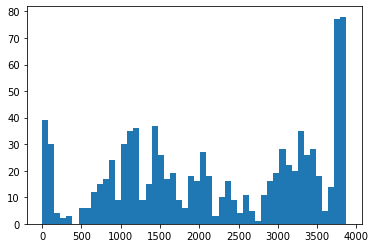

In [19]:
plt.hist(df_id_missing.index, bins = 50)

In [20]:
df_id_missing.to_csv('Missing_IDs.csv')

In [21]:
df2['layer_label'].value_counts()

3          823
4          439
2          335
_5         324
5          224
1          218
3b          85
3a          71
3c          52
HIPbCA1     43
PCx_5       40
_6          33
_4          33
CBX_mo      29
6           29
PCx4        18
OCx3        18
_3          13
PCx_3       11
OCx2         9
PCx1         6
OCx4         6
_2           6
OCx5         5
OCx3c        5
CCx_5        5
HIPbCA3      5
PCx3a        4
PCx3b        4
HIPbCA2      4
OCx3a        4
2.5          3
ICx_5        3
PCx_4        3
CB           3
PCx3c        3
PCx5         3
PCx2         2
PCx3         2
CCx_6        2
OCx3b        1
OCx1         1
HIPbDG       1
PCx_6        1
PCx_3c       1
_3c          1
_3a          1
Name: layer_label, dtype: int64

In [22]:
df2['roi_label'].value_counts()[1:20]

TCx_L4      366
TCx_L2      244
TCx_L_L5    201
TCx_L1      195
FCx_L3      184
TCx_L5      147
FCx_L_L5    123
FCx_L2       91
TCx_L3b      80
FCx_L5       73
FCx_L4       72
TCx_L3a      63
TCx_L3c      47
HIPbCA1      43
PCx_L_L5     40
CBX_mo       29
TCx_L_L6     23
FCx_L1       23
TCx_L_L4     21
Name: roi_label, dtype: int64

In [23]:
df2['cell_name_label']

0             H17.03.013.11.09.01
1             H17.03.013.11.09.03
2             H17.03.014.11.03.01
3             H17.03.014.11.04.02
4             H17.03.014.11.09.01
                  ...            
2927    h19.03.002.12.01.01.02.08
2928    h19.03.002.12.01.01.02.09
2929    h19.03.002.12.01.01.02.10
2930    h19.03.002.12.01.01.02.11
2931    h19.03.002.12.01.01.02.12
Name: cell_name_label, Length: 2932, dtype: object

In [28]:
df2[df2['roi_label'] == "HIPbCA1"]['subclass_label']

1673    LAMP5/PAX6/Other
1674          Chandelier
1675                 SST
1676                 SST
1677                 VIP
1678                 SST
1679    LAMP5/PAX6/Other
1682                 SST
1683          Chandelier
1684             L2/3 IT
1685          Chandelier
1686                 VIP
1687    LAMP5/PAX6/Other
1688                 SST
1692               PVALB
1693               PVALB
1695                 VIP
1696               PVALB
1697    LAMP5/PAX6/Other
1698    LAMP5/PAX6/Other
1699                 SST
1701               PVALB
1702    LAMP5/PAX6/Other
1703                 SST
1704    LAMP5/PAX6/Other
1707               PVALB
1708               L4 IT
1709               PVALB
1710               L5 IT
1711                 VIP
1712          Chandelier
1713                 SST
1714          Chandelier
1715                 VIP
1716          Chandelier
1718                 SST
1719    LAMP5/PAX6/Other
1720               PVALB
1721    LAMP5/PAX6/Other
1722                 SST


In [24]:
df3 = pd.merge(df2, df_ephys, how='inner', left_on='cell_specimen_id ', right_on='cell_name', sort=True)
len(df3)

2928

In [26]:
# sum(df3['subclass_label']=='FAIL')
# None are FAIL
df3['subclass_label']

0           VIP
1           VIP
2         PVALB
3         L5 IT
4       L2/3 IT
         ...   
2923      L5 IT
2924      L5 IT
2925      L6 CT
2926      L6 IT
2927    L5/6 NP
Name: subclass_label, Length: 2928, dtype: object

In [25]:
# sum(df3['cluster_label']=='FAIL')
# about 15% are FAIL
df3['cluster_label']

0                          VIP|h
1            Inh L1-2 VIP PCDH20
2                         LHX6|a
3           Exc L4-6 RORB SEMA3E
4       Exc L2-3 LINC00507 FREM3
                  ...           
2923        Exc L4-5 RORB FOLH1B
2924        Exc L4-6 RORB SEMA3E
2925                  Excitatory
2926               THEMIS (L6)|a
2927                  Excitatory
Name: cluster_label, Length: 2928, dtype: object

<Axes: xlabel='subclass_label', ylabel='width_rheo'>

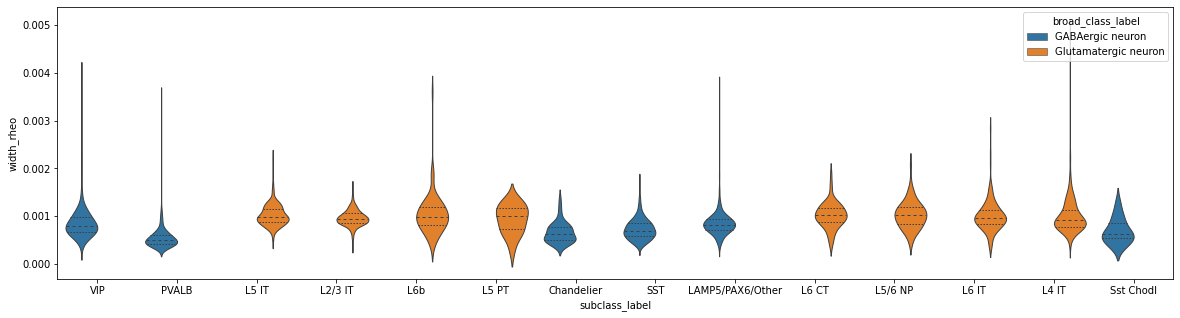

In [26]:
plt.figure(figsize=(20,5))
sns.violinplot(data=df3, x="subclass_label", y="width_rheo", hue="broad_class_label",
               split=False, inner="quart", linewidth=1)

# You can specify a palette   palette={"Glutamatergic_neuron": "g", "GABAergic_neuron": "b"}
#                        sns.violinplot(x='species', y='sepal_width', data=datasets,
#               inner="quart", linewidth=1)


In [27]:
# Has this been QC filtered? check params
df3_filt = df3[df3['rna_amplification_pass_fail_label']=='Pass']
print(len(df3_filt))
df3_filt = df3_filt[df3_filt['percent_reads_aligned_total_label']>=50]
print(len(df3_filt))
df3_filt = df3_filt[df3_filt['genes_label']>=1000]
print(len(df3_filt))

inds = np.array([any([x in layer for x in ['4','5','6']]) and '.' not in layer for layer in df3_filt['layer_label']])
df3_filt = df3_filt[inds]
print(len(df3_filt))

2437
2395
2394
922


<Axes: xlabel='subclass_label', ylabel='width_rheo'>

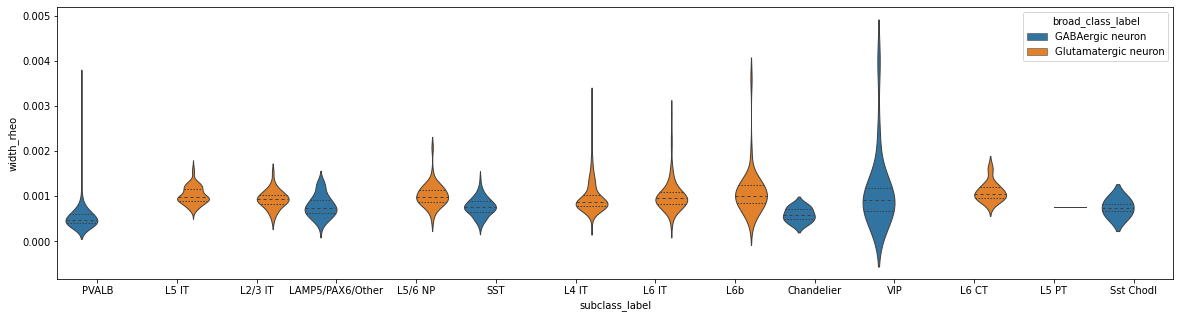

In [28]:
plt.figure(figsize=(20,5))
sns.violinplot(data=df3_filt, x="subclass_label", y="width_rheo", hue="broad_class_label",
               split=False, inner="quart", linewidth=1)

In [29]:
df3_filt['subclass_label'].value_counts()


L4 IT               190
L5 IT               170
PVALB               127
SST                 113
L6 IT                90
L5/6 NP              47
LAMP5/PAX6/Other     46
L2/3 IT              45
L6b                  41
VIP                  21
L6 CT                21
Chandelier            8
Sst Chodl             2
L5 PT                 1
Name: subclass_label, dtype: int64

/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_5168/3139946100.py:9: RuntimeWarning: invalid value encountered in log
  plt.scatter(np.log(feat_means), np.log(feat_cv))


2          NaN
3          NaN
6          NaN
16         NaN
18         NaN
22         NaN
24         NaN
25         NaN
28         NaN
41    0.406955
42    0.765777
44   -0.300162
50   -0.068830
59   -0.030352
60   -0.048920
63   -0.022448
64   -0.082771
66    0.012617
70   -0.002972
73    0.125475
Name: phase_low_chirp, dtype: float64

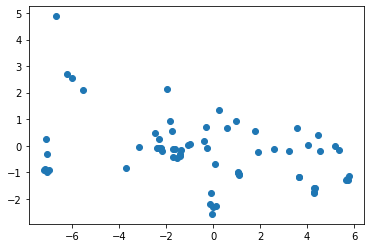

In [30]:
# Most variable features across categories

# 1. Following gist of: http://pklab.med.harvard.edu/scw2014/subpop_tutorial.html
df_ephys_sub = df3_filt.iloc[:,340:432]
feat_means = np.nanmean(df_ephys_sub, axis=0)
feat_vars = np.nanvar(df_ephys_sub, axis=0)
feat_cv = np.sqrt(feat_vars)/feat_means

plt.scatter(np.log(feat_means), np.log(feat_cv))

# np.where(feat_cv>100)    # 90
df_ephys_sub.iloc[:,90][0:20]     

# Doesn't quite work because not enough features to fit regression lines for cut off

Index(['sag_area', 'fi_fit_slope', 'mean_isi_rheo', 'postap_slope_rheo',
       'adapt_hero', 'isi_cv_hero', 'postap_slope_hero',
       'ahp_delay_ratio_hero', 'sag_area_depol', 'adapt_mean', 'isi_cv_mean',
       'isi_adapt_ratio', 'ahp_delay_ratio_5spike', 'trough_slowdeltav_rheo',
       'trough_slowdeltav_hero', 'first_isi_inv_rheo', 'first_isi_inv_hero',
       'postap_slope_ramp', 'phase_low_chirp', 'total_inductive_phase_chirp'],
      dtype='object')

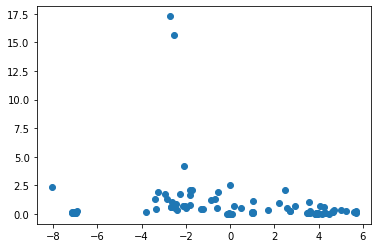

In [31]:
feat_abs_means = np.nanmean(np.log(np.abs(df_ephys_sub)+0.0001), axis=0)
feat_log_vars = np.nanvar(np.log(np.abs(df_ephys_sub)+0.0001), axis=0)
# logging zero creates some Infs

plt.scatter(feat_abs_means, feat_log_vars)

# Least variable
np.where(np.log(feat_log_vars)< -3)

# Most variable
most_var = np.where(np.log(feat_log_vars)> 0)

df_ephys_sub.columns[most_var]


In [32]:
feat_means

array([ 2.85750683e+00, -3.83488244e+01,  8.37273248e-04,  3.20198377e+02,
       -1.25344225e+02,  7.88669770e-04,  7.50972045e+01,  1.79114033e-01,
        7.59686712e-01,  1.71740340e-01, -6.37224732e+01,  8.61257005e+01,
        2.43574854e-01, -8.69186973e+01,  2.17797962e+02,  1.83653665e+02,
        2.47657050e-02,  1.82978866e-01,  2.62962963e+00,  1.93177711e-01,
        2.99052044e+00, -3.40657700e+01,  3.96051361e+01,  9.04955006e-04,
        3.04698642e+02, -1.14662526e+02,  7.81743532e-04, -5.33289488e+01,
       -5.09036860e+01,  1.40930008e-01, -5.06925810e+01, -4.69399126e+01,
        8.53608545e-02,  1.33883277e+01,  4.24208530e-02,  9.12192379e-02,
        9.40388139e-02,  2.57789057e-01,  1.08595429e-01,  2.96858679e+00,
       -3.47609722e+01,  3.92343170e+01,  8.51112360e-04,  3.15719558e+02,
       -1.19379770e+02,  7.44797525e-04, -5.06477268e+01, -5.02567927e+01,
        7.40359912e-01,  1.09409171e-01,  2.13824198e-01,  6.88280869e-01,
        1.58536937e-01,  

In [33]:
feat_log_vars

array([1.12316854e-01, 5.26585509e-02, 1.32158779e-01, 2.54596409e-01,
       3.61277544e-01, 1.60939476e-01, 1.28606484e-01, 6.19279850e-01,
       1.72746946e+01, 7.40934001e-01, 9.75318740e-03, 6.88821684e-01,
       1.67860843e+00, 1.82004910e-02, 3.03588516e-01, 3.62182351e-01,
       1.96792056e-01, 7.29829816e-01, 5.59153779e-01, 1.78290459e+00,
       1.32876684e-01, 5.49809399e-02, 2.33535351e-01, 1.05317968e-01,
       1.34563804e-01, 2.17684253e-01, 1.20117404e-01, 6.54879035e-02,
       6.69755583e-02, 1.34234488e+00, 4.41273856e-02, 3.80898764e-02,
       1.90512908e+00, 9.71292037e-01, 4.02165545e-01, 5.89938433e-01,
       6.32797622e-01, 4.15095274e+00, 5.12942295e-01, 1.17882630e-01,
       6.04750983e-02, 2.03212126e-01, 1.00021926e-01, 1.30725203e-01,
       2.28280071e-01, 1.13737521e-01, 3.73644324e-02, 3.86978428e-02,
       1.90474322e+00, 1.04455441e+00, 8.25070443e-01, 1.56299362e+01,
       8.50075852e-01, 1.72317602e+00, 2.10846072e+00, 3.67257628e-01,
      

In [34]:
import scipy.stats as stats

df_ephys_sub1 = pd.merge(df3_filt[['subclass_label', 'broad_class_label']], df_ephys_sub, left_index=True, right_index=True)

stats.f_oneway(df_ephys_sub1['tau'][df_ephys_sub1['subclass_label'] == 'PVALB'],
               df_ephys_sub1['tau'][df_ephys_sub1['subclass_label'] == 'SST'],
               df_ephys_sub1['tau'][df_ephys_sub1['subclass_label'] == 'LAMP5/PAX6/Other'],
               df_ephys_sub1['tau'][df_ephys_sub1['subclass_label'] == 'VIP'])
               


F_onewayResult(statistic=nan, pvalue=nan)

In [35]:
# Subset to only inhibitory neurons
df_ephys_sub_I = df_ephys_sub1[df_ephys_sub1['broad_class_label']== 'GABAergic neuron']

np2_vec = np.empty([2, df_ephys_sub_I.shape[1]-2])

i = 0 
for feat in df_ephys_sub_I.columns[2:]:    
    aov = pg.anova(dv=feat, between='subclass_label', data=df_ephys_sub_I,
                detailed=True)
    np2_vec[0,i] = aov.np2[0].round(3)
    np2_vec[1,i] = aov['p-unc'][0]
    i+=1

data_tuples = list(zip(df_ephys_sub_I.columns[2:],np2_vec[0,:],np2_vec[1,:]))
df_I = pd.DataFrame(data_tuples)
df_I.columns = ['Feature', 'Partial_eta_squared', 'p-value']

df_I = df_I.sort_values(by='Partial_eta_squared', ascending=True)
#df_I.columns = df_ephys_sub_I.columns[2:]

min_ind = np.min(np.where(df_I['p-value']<0.05))
print(min_ind)
df_I

28


,Feature,Partial_eta_squared,p-value
5,width_suprathresh_short_square,0.003,9.763670e-01
21,threshold_v_rheo,0.006,8.817190e-01
33,avg_rate_hero,0.010,7.252530e-01
73,threshold_v_ramp,0.011,5.895894e-01
91,total_inductive_phase_chirp,0.012,8.795504e-01
...,...,...,...
25,downstroke_rheo,0.276,5.486132e-19
45,width_suprathresh_hero,0.276,6.554391e-19
42,width_hero,0.291,2.634909e-20
44,downstroke_hero,0.293,1.902379e-20


In [36]:
# Subset to only excitatory neurons
df_ephys_sub_E = df_ephys_sub1[df_ephys_sub1['broad_class_label']== 'Glutamatergic neuron']

np2_vec = np.empty([2, df_ephys_sub_E.shape[1]-2])

i = 0 
for feat in df_ephys_sub_E.columns[2:]:    
    aov = pg.anova(dv=feat, between='subclass_label', data=df_ephys_sub_E,
                detailed=True)
    np2_vec[0,i] = aov.np2[0].round(3)
    np2_vec[1,i] = aov['p-unc'][0]
    i+=1

data_tuples = list(zip(df_ephys_sub_E.columns[2:],np2_vec[0,:],np2_vec[1,:]))
df_E = pd.DataFrame(data_tuples)
df_E.columns = ['Feature', 'Partial_eta_squared', 'p-value']

df_E = df_E.sort_values(by='Partial_eta_squared', ascending=True)

min_ind = np.min(np.where(df_E['p-value']<0.05))
print(min_ind)
df_E

26


,Feature,Partial_eta_squared,p-value
91,total_inductive_phase_chirp,0.003,9.978080e-01
77,width_suprathresh_ramp,0.004,9.027873e-01
74,width_ramp,0.004,9.071081e-01
45,width_suprathresh_hero,0.006,8.007172e-01
5,width_suprathresh_short_square,0.007,7.795747e-01
...,...,...,...
67,fast_trough_deltav_hero,0.248,1.370664e-32
7,sag,0.251,3.646931e-33
13,vm_for_sag,0.265,1.456343e-35
48,postap_slope_hero,0.309,3.256110e-43


/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_5168/3148909263.py:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 90, fontsize = 16)
/var/folders/vj/7bfz8tc91053qf1swtym13nc0000gp/T/ipykernel_5168/3148909263.py:8: UserWarning: FixedFormatter should only be used together with FixedLocator
  axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 90, fontsize = 16)


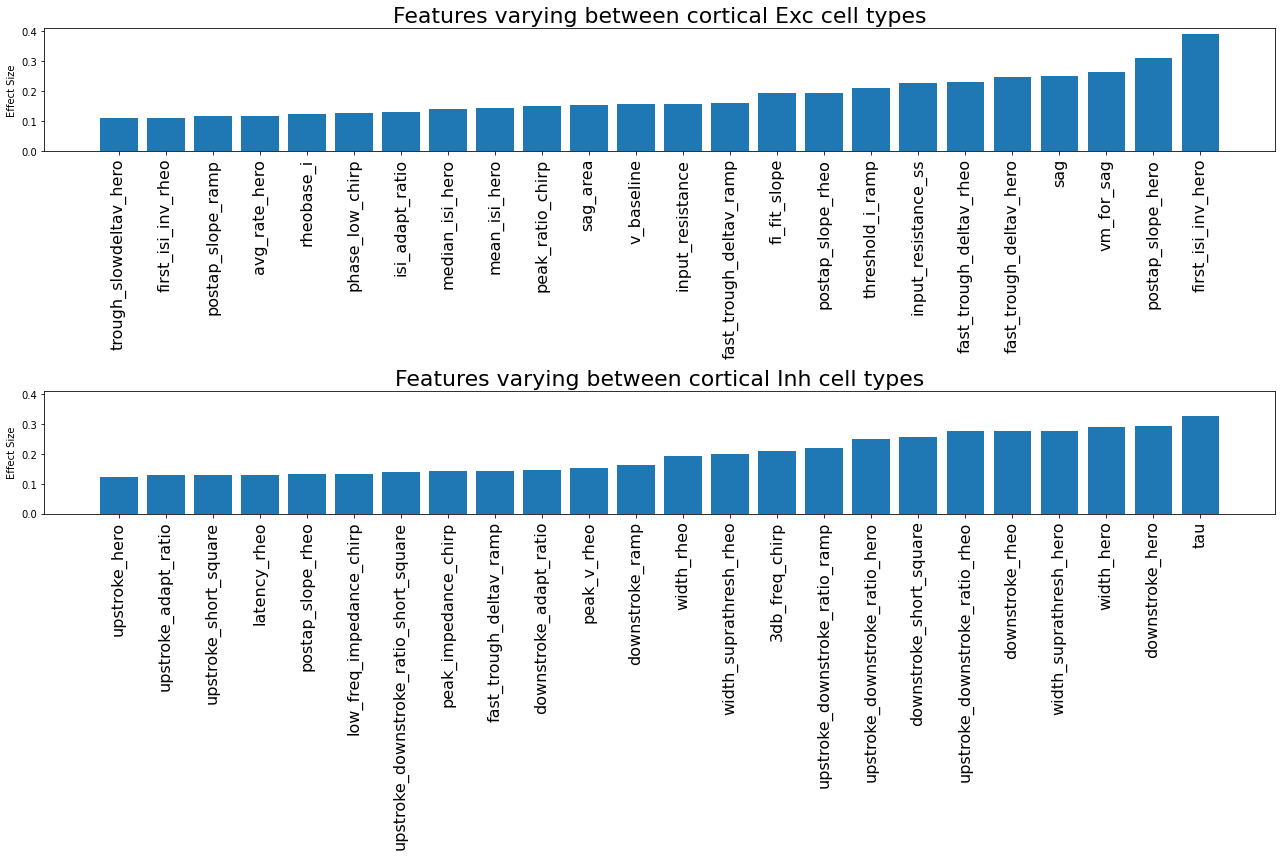

In [37]:
fig, axs = plt.subplots(2, 1, figsize=(18, 12), sharey=True)
axs[0].bar(df_E['Feature'][-24:], df_E['Partial_eta_squared'][-24:])
axs[0].set_xticklabels(axs[0].get_xticklabels(), rotation = 90, fontsize = 16)
axs[0].set_ylabel('Effect Size')
axs[0].set_title('Features varying between cortical Exc cell types', fontsize = 22)

axs[1].bar(df_I['Feature'][-24:], df_I['Partial_eta_squared'][-24:])
axs[1].set_xticklabels(axs[1].get_xticklabels(), rotation = 90, fontsize = 16)
axs[1].set_ylabel('Effect Size')
axs[1].set_title('Features varying between cortical Inh cell types', fontsize = 22)

fig.tight_layout()

Text(0.5, 1.0, 'vm_for_sag')

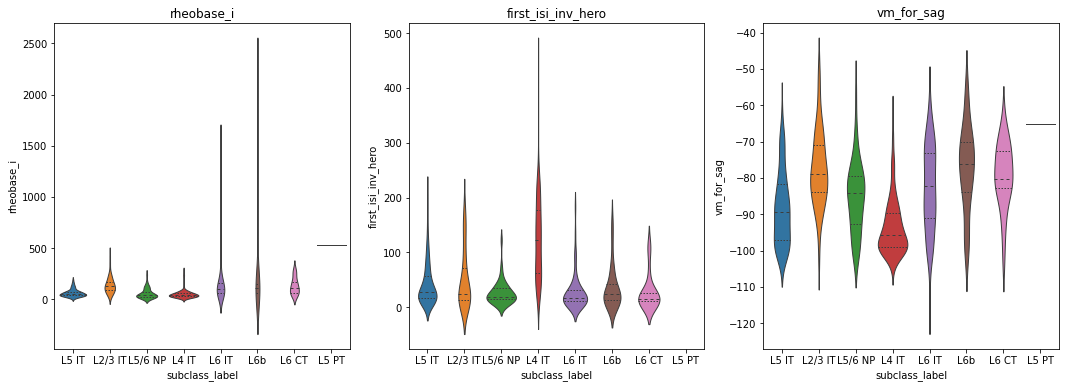

In [38]:
fig2, axs = plt.subplots(1, 3, figsize=(18, 6))
plt.axes(axs[0])
sns.violinplot(data=df_ephys_sub_E, x="subclass_label", y="rheobase_i",
               split=False, inner="quart", linewidth=1)
plt.title('rheobase_i')

plt.axes(axs[1])
sns.violinplot(data=df_ephys_sub_E, x="subclass_label", y="first_isi_inv_hero",
               split=False, inner="quart", linewidth=1)
plt.title('first_isi_inv_hero')

plt.axes(axs[2])
sns.violinplot(data=df_ephys_sub_E, x="subclass_label", y="vm_for_sag",
               split=False, inner="quart", linewidth=1)
plt.title('vm_for_sag')

Text(0.5, 1.0, 'downstroke_hero')

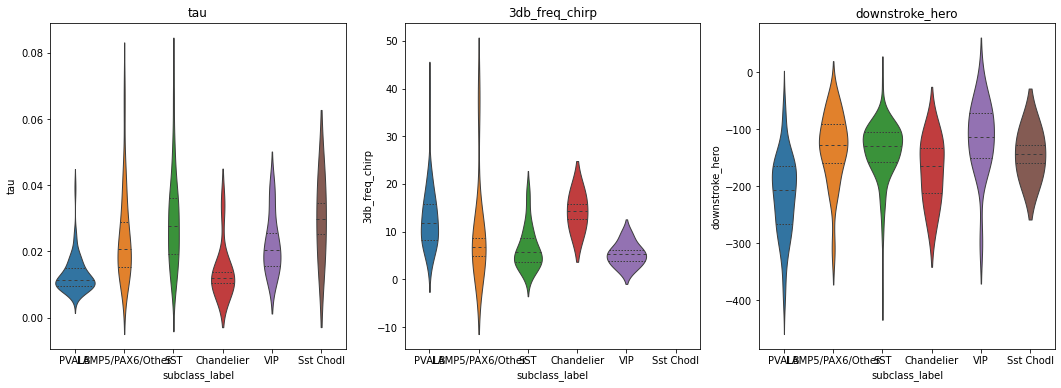

In [39]:
fig3, axs = plt.subplots(1, 3, figsize=(18, 6))
plt.axes(axs[0])
sns.violinplot(data=df_ephys_sub_I, x="subclass_label", y="tau",
               split=False, inner="quart", linewidth=1)
plt.title('tau')

plt.axes(axs[1])
sns.violinplot(data=df_ephys_sub_I, x="subclass_label", y="3db_freq_chirp",
               split=False, inner="quart", linewidth=1)
plt.title('3db_freq_chirp')

plt.axes(axs[2])
sns.violinplot(data=df_ephys_sub_I, x="subclass_label", y="downstroke_hero",
               split=False, inner="quart", linewidth=1)
plt.title('downstroke_hero')

In [40]:
# POST QC
print(len(df3_filt))
#df3_filt = df3_filt[df3_filt['marker_sum_norm_label']>=0.4]
df3_filt = df3_filt[df3_filt['marker_sum_norm_label']>=0.6]
#df3_filt = df3_filt[df3_filt['score.Corr']>=0.55]
print(len(df3_filt))

922
656


In [41]:
df3_filt.columns[1:10]

Index(['exp_component_name_label', 'exp_component_name_color', 'layer_id',
       'layer_label', 'layer_color', 'batch_id', 'batch_label', 'batch_color',
       'cell_name_id'],
      dtype='object')

In [42]:
df_ephys_sub = df3_filt.iloc[:,340:432]
np.mean(df_ephys, axis=0)

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/numpy/core/fromnumeric.py:3417: FutureWarning: Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


cell_name                      9.282884e+08
blowout_mv_qc                  2.387971e+00
electrode_0_pa_qc              3.815526e+00
seal_gohm_qc                   2.699819e+00
input_resistance_mohm_qc       2.821881e+02
                                   ...     
low_freq_impedance_chirp       3.297873e-01
sync_freq_chirp                1.461915e+00
phase_peak_chirp              -1.399712e-01
phase_low_chirp               -4.950716e-04
total_inductive_phase_chirp    3.721579e-03
Length: 109, dtype: float64

In [43]:
df3_filt.columns.get_loc('upstroke_downstroke_ratio_short_square')

340

In [44]:
import numpy as np
np.unique(df_anno['layer_label'])

array(['', '1', '2', '2.5', '3', '3a', '3b', '3c', '4', '5', '6', 'CB',
       'CBNA', 'CBX_mo', 'CCx_5', 'CCx_6', 'HIPCA1', 'HIPbCA1', 'HIPbCA2',
       'HIPbCA3', 'HIPbDG', 'HIPb_CA2', 'ICx_5', 'MOp2-3', 'MOp3', 'MOp5',
       'MOp_2-3', 'OCx1', 'OCx2', 'OCx3', 'OCx3a', 'OCx3b', 'OCx3c',
       'OCx4', 'OCx5', 'PCx1', 'PCx2', 'PCx3', 'PCx3a', 'PCx3b', 'PCx3c',
       'PCx4', 'PCx5', 'PCx6', 'PCx_3', 'PCx_3c', 'PCx_4', 'PCx_5',
       'PCx_6', 'STRdCP', 'STRdCa', 'STRdPu', 'STRd_Ca', 'STRd_Pu',
       'STRvACB', 'TEa1', 'TEa2-3', 'TEa5', 'Tcx', 'ZZ_Missing', '_2',
       '_3', '_3a', '_3c', '_4', '_5', '_6', 'dGNShell', 'dlPFC3'],
      dtype=object)

In [45]:
np.unique(df3['layer_label'])

array(['1', '2', '2.5', '3', '3a', '3b', '3c', '4', '5', '6', 'CB',
       'CBX_mo', 'CCx_5', 'CCx_6', 'HIPbCA1', 'HIPbCA2', 'HIPbCA3',
       'HIPbDG', 'ICx_5', 'OCx1', 'OCx2', 'OCx3', 'OCx3a', 'OCx3b',
       'OCx3c', 'OCx4', 'OCx5', 'PCx1', 'PCx2', 'PCx3', 'PCx3a', 'PCx3b',
       'PCx3c', 'PCx4', 'PCx5', 'PCx_3', 'PCx_3c', 'PCx_4', 'PCx_5',
       'PCx_6', '_2', '_3', '_3a', '_3c', '_4', '_5', '_6'], dtype=object)

(array([347., 223., 270., 296., 332., 385., 466., 365., 214.,  30.]),
 array([0.        , 0.06526172, 0.13052345, 0.19578517, 0.2610469 ,
        0.32630862, 0.39157035, 0.45683207, 0.5220938 , 0.58735552,
        0.65261725]),
 <BarContainer object of 10 artists>)

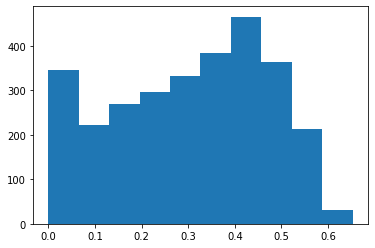

In [46]:
plt.hist(df3['quality_score_label'])

In [47]:
# Drop non-continguous index from df_ephys_sub - otherwise can cause problems later on

df_ephys_sub.reset_index(inplace=True, drop=True)

df3_filt.reset_index(inplace=True, drop=True)

In [48]:
# Optionally run this to remove outliers
from scipy.stats import skew

keep = set(np.arange(len(df_ephys_sub)))
feat_outliers = []
df_ephys_sub_no_outliers = df_ephys_sub.copy()
for feat in df_ephys_sub.columns:    
    sk = skew(df_ephys_sub[feat], nan_policy = 'omit')
    if sk > 5:     # If very right skewed, log transform
        if any(df_ephys_sub[feat] == 0):
            min_nonzero = np.nanmin(df_ephys_sub[feat][df_ephys_sub[feat]!=0]) 
            feat_vals = np.log(df_ephys_sub[feat]+min_nonzero)     # Careful creates a histogram bump at 0
        else:
            feat_vals = np.log(df_ephys_sub[feat])     
        # Be careful whether you want to add 0, but it's largely not counts, so not often zero?
    else:
        feat_vals = df_ephys_sub[feat]
    Q1 = np.nanpercentile(feat_vals, 25)
    Q3 = np.nanpercentile(feat_vals, 75)
    IQR = Q3 - Q1

    thresh = 2.0
    while True: 
        # Above Upper bound
        upper=Q3+thresh*IQR
        nz_inds_upper = np.nonzero(np.array(feat_vals>upper))
        #upper_array=np.array(df_ephys_sub[feat].iloc[nz_inds[0]])
        #print("Upper Bound:",upper)
        #print(df_ephys_sub[feat][upper_array])
 
        #Below Lower bound
        lower=Q1-thresh*IQR
        nz_inds_lower = np.nonzero(np.array(feat_vals<lower))
        #print("Lower Bound:",lower)
        #print(df_ephys_sub[feat][lower_array])
        if len(nz_inds_upper[0])+len(nz_inds_lower[0]) < 0.005 * len(feat_vals):
            break
        thresh += 0.5
        
    if len(nz_inds_upper[0]) != 0:
        print("Severe high outlier(s) for feature ", feat)
        print(feat_vals.iloc[nz_inds_upper[0]])
    if len(nz_inds_lower[0]) != 0:
        print("Severe low outlier(s) for feature ", feat)
        print(feat_vals.iloc[nz_inds_lower[0]])
               
    keep = keep.difference(set(nz_inds_upper[0]))
    keep = keep.difference(set(nz_inds_lower[0]))
    feat_outliers.append(set(np.hstack((nz_inds_upper[0], nz_inds_lower[0]))))
    df_ephys_sub_no_outliers[feat].iloc[list(np.hstack((nz_inds_upper[0], nz_inds_lower[0])))] = np.nan
    #keep.remove(lower_array)
    
print(keep)
print(len(list(keep)))
#df_ephys_sub_no_out = df_ephys_sub.iloc[list(keep)]

# I think okay to set to NaN because many of the NaN's may be due to disqualifying values
# See if it improves correspondence between slope and p val?

Severe high outlier(s) for feature  upstroke_downstroke_ratio_short_square
323    10.047507
476     6.979089
533     7.797805
Name: upstroke_downstroke_ratio_short_square, dtype: float64
Severe high outlier(s) for feature  threshold_v_short_square
476   -6.3125
Name: threshold_v_short_square, dtype: float64
Severe high outlier(s) for feature  width_short_square
253   -4.648078
323   -4.820842
Name: width_short_square, dtype: float64
Severe low outlier(s) for feature  width_short_square
588   -9.028019
Name: width_short_square, dtype: float64
Severe low outlier(s) for feature  downstroke_short_square
220   -405.711269
Name: downstroke_short_square, dtype: float64
Severe high outlier(s) for feature  width_suprathresh_short_square
253   -4.419521
282   -4.461936
423   -4.712755
Name: width_suprathresh_short_square, dtype: float64
Severe low outlier(s) for feature  peak_deltav_short_square
476    5.59375
614    1.81250
Name: peak_deltav_short_square, dtype: float64
Severe high outlier(s) f

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/pandas/core/arraylike.py:397: RuntimeWarning: invalid value encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In general, we may take a strategy of automatic flagging followed by human inspection for dealing with outliers. The features that trigger many outliers by the 5 * IQR rule often with a continuous range of values seem likely to be skewed (for which IQR is not a great way to detect outliers). Those features have skew > 5 (positive is right skewed), and benefit from log transforming before outlier detection, e.g., "width_suprathresh_short_square" or "width_short_square", "sag_tau". I think severe right skew is more common because many values are zero bounded on the left. Values for "input_resistance" of ~2500 and 4000 (MOhms?) can't be right? We may lose lots of data this way though if we eliminate the entire row. We also want to make sure we aren't eliminating particular subgroups with truly far out values. e.g., those high input_resistances are all coming from SST class, but those very few points are a very small part of the distribution of SST values. May want to look at original data.

23.184129495998405


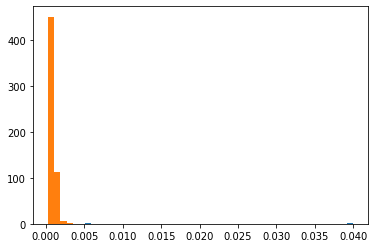

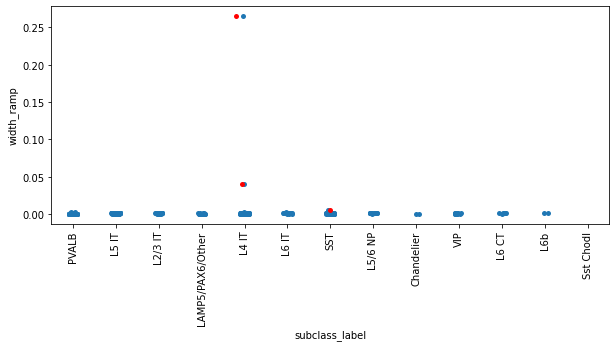

In [134]:
from scipy.stats import skew

#feat = 'upstroke_downstroke_ratio_short_square'
#feat = 'total_inductive_phase_chirp'
#feat = 'phase_peak_chirp'
#feat = 'threshold_v_short_square'
feat = 'width_ramp'
#feat = "avg_rate_rheo"

sk = skew(df_ephys_sub[feat], nan_policy = 'omit')
print(sk)

(n, bins, patches) = plt.hist(df_ephys_sub[feat][df_ephys_sub[feat]<0.1], bins = 50)   # Needs log transform
#min_nonzero = np.nanmin(df_ephys_sub[feat][df_ephys_sub[feat]!=0]) 
#feat_vals = np.log(df_ephys_sub[feat]+min_nonzero) 
#plt.hist(feat_vals)
plt.hist(df_ephys_sub_no_outliers[feat], bins = bins)

fig,ax = plt.subplots(figsize=(10, 4))
sns.stripplot(data=df3_filt, x="subclass_label", y=feat, ax=ax)
plt.xticks(rotation = 90)
feat_ind = int(np.nonzero(df_ephys_sub.columns==feat)[0])

sns.stripplot(data=df3_filt.iloc[list(feat_outliers[feat_ind])], x="subclass_label", y=feat, ax=ax, color='r')
#plt.yscale("log")
#plt.xlim([-1,15])
plt.show()

In [50]:
np.unique(df3_filt['subclass_label'])

array(['Chandelier', 'L2/3 IT', 'L4 IT', 'L5 IT', 'L5/6 NP', 'L6 CT',
       'L6 IT', 'L6b', 'LAMP5/PAX6/Other', 'PVALB', 'SST', 'Sst Chodl',
       'VIP'], dtype=object)

In [51]:
# Pairwise comparisons for features at subclass level

from sklearn.datasets import load_iris
from sklearn.preprocessing import LabelBinarizer

#target_names = iris.target_names    # unique list of target categories, indexable from the target numbers
#X = df_ephys_sub.iloc[:,:92]     # rows = samples
X = df_ephys_sub_no_outliers.iloc[:,:92]
y = df3_filt['subclass_label']

random_state = np.random.RandomState(0)
n_samples, n_features = X.shape
n_classes = len(np.unique(y))
print("n samples:", n_samples)
print("n classes:", n_classes)
print("n features:", n_features)

# You have too little data to do train-test validation

label_binarizer = LabelBinarizer().fit(y)
y_onehot = label_binarizer.transform(y)
y_onehot.shape  # (n_samples, n_classes)

#label_binarizer.transform(["virginica"])

n samples: 656
n classes: 13
n features: 92


(656, 13)

In [52]:
class_of_interest = "PVALB"
class_id = np.flatnonzero(label_binarizer.classes_ == class_of_interest)[0]
class_id

9

In [53]:
np.unique(df3_filt['subclass_label'])

array(['Chandelier', 'L2/3 IT', 'L4 IT', 'L5 IT', 'L5/6 NP', 'L6 CT',
       'L6 IT', 'L6b', 'LAMP5/PAX6/Other', 'PVALB', 'SST', 'Sst Chodl',
       'VIP'], dtype=object)

In [54]:
from sklearn.impute import KNNImputer
import numpy as np

imputer = KNNImputer(missing_values=np.nan)
X_imputed = imputer.fit_transform(X)    # n_samples x n_features

In [55]:
from sklearn.preprocessing import StandardScaler, RobustScaler

#scaler = RobustScaler()    # Produces weird results, maybe due to skew?
scaler = StandardScaler().fit(X_imputed)
X_std = scaler.transform(X_imputed)

mean_vec = np.mean(X_std, axis=0)
mean_vec

# IDEALLY SHOULD SPLIT THE DATA

array([-1.08314441e-16,  3.57437657e-16,  2.54538937e-16,  6.44470926e-16,
        3.92639850e-17,  1.35393052e-17,  7.79863978e-16, -8.66515531e-17,
        8.66515531e-17, -2.70786104e-17,  1.64637951e-15, -2.16628883e-17,
        2.16628883e-16,  6.49886649e-17, -5.41572207e-17, -8.66515531e-17,
        4.33257766e-17,  2.16628883e-16,  8.66515531e-17,  1.40808774e-16,
        7.04043869e-17,  5.41572207e-16,  4.76583542e-16,  3.24943324e-16,
        3.73684823e-16,  2.30168188e-16, -2.22044605e-16,  1.06148153e-15,
       -2.59954659e-16,  2.16628883e-17, -2.59954659e-16, -6.44470926e-16,
        4.60336376e-17, -4.33257766e-17, -7.58201090e-17,  3.24943324e-17,
       -1.51640218e-16, -5.41572207e-17, -1.51640218e-16,  1.13730163e-16,
        2.38291771e-16, -3.79100545e-16, -3.24943324e-16,  2.05797439e-16,
        3.92639850e-17, -4.17010599e-16, -2.16628883e-17,  8.66515531e-16,
       -2.16628883e-17,  1.29977330e-16, -3.14111880e-16, -5.14493597e-17,
        5.95729428e-17, -

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score
# C: Inverse of regularization strength; smaller values specify stronger regularization.
#clf = LogisticRegression(penalty='l1', solver="liblinear", random_state=0, C=0.5).fit(X_std, y)
#clf = LogisticRegression(penalty='l1', solver="liblinear", random_state=0, C=0.5, multi_class='ovr').fit(X_std, y)
#clf = LogisticRegression(solver="liblinear", random_state=0, multi_class='ovr').fit(X_std, y)  # LAST USED
clf = LogisticRegression(solver="lbfgs", random_state=0, multi_class='multinomial').fit(X_std, y)
# I don't think random_state does anything here
roc_auc_score(y, clf.predict_proba(X_std), multi_class='ovo')
#roc_auc_score(y, clf.predict_proba(X_std), multi_class='ovr')

# HOW DOES IT COMBINE THE VARIOUS CLASSES' ROCs?

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9944295438010616

In [57]:
y.iloc[0]

'PVALB'

In [58]:
X_std[0,:]

array([-7.14108711e-01, -1.34966710e-01, -7.88216338e-01,  7.80144187e-01,
       -8.65517100e-01, -6.69907341e-01, -4.30486141e-01,  3.02787524e-01,
        3.16264341e-01, -1.37679858e-01,  4.70286268e-01, -5.48386030e-01,
        9.26470082e-01,  4.72632786e-01, -2.12205631e-01, -2.77116609e-01,
       -7.08390930e-01, -5.41146982e-01, -4.41609160e-01, -1.35530213e-01,
       -7.89272615e-01,  1.68271121e-01, -8.68828935e-01, -1.05975624e+00,
        5.92684179e-01, -8.11658213e-01, -1.14193909e+00, -1.03465550e+00,
       -1.26408179e+00, -4.68244485e-01, -1.25681612e+00, -4.45194529e-01,
       -2.65637679e-01,  5.81159850e-01, -6.63836657e-01, -5.49946940e-01,
       -6.52800511e-01,  1.08587606e+00,  5.85837600e+00, -7.31224213e-01,
       -6.04043229e-04, -6.96402383e-01, -1.00217772e+00,  7.09479795e-01,
       -7.77198370e-01, -1.06326012e+00, -1.30400615e+00, -1.33125740e+00,
       -5.88565796e-01, -1.14232244e+00,  4.75084042e-01, -6.80764858e-02,
       -2.05269213e-01, -

524
525
525
525
525
0.654001850566736
524
525
525
525
525
0.6585820032384918
524
525
525
525
525
0.6890122600046265
524
525
525
525
525
0.6890122600046265
524
525
525
525
525
0.6890006939625261
524
525
525
525
525
0.6905274115197779
524
525
525
525
525
0.6920541290770299
524
525
525
525
525
0.6859241267638214


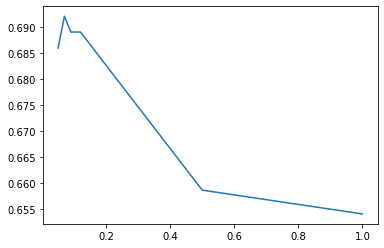

In [225]:
# Optional crossvalidation check - accu 0.64 after post-QC, 0.50 before post-QC
# TRY WITH sPCA components?? there is multicollinearity

from sklearn.model_selection import KFold

kf =KFold(n_splits=5, shuffle=True, random_state=1)

C_list = [1.0, 0.5, 0.12, 0.1, 0.09, 0.08, 0.07, 0.05]
perc_corr_all = []

for c in C_list:
    perc_corr = []
    for train_index, test_index in kf.split(X_std, y):

        print(len(train_index))
        clf_full = LogisticRegression(solver="lbfgs", multi_class='multinomial', penalty = "l2", max_iter=1000, C=c).fit(X_std[train_index], y[train_index])

        #Predict the response for test dataset
        y_pred = clf_full.predict(X_std[test_index])

        perc_corr.append(sum(y_pred==y[test_index])/len(y[test_index]))

    print(np.mean(perc_corr))
    perc_corr_all.append(np.mean(perc_corr))
    
plt.plot(C_list, perc_corr_all)
# C = 0.07 best

# No interaction terms?

In [ ]:
clf_full = LogisticRegression(solver="lbfgs", multi_class='multinomial', penalty = "l2", max_iter=1000, C=0.07).fit(X_std[train_index], y[train_index])


In [60]:
from sklearn.model_selection import KFold

kf =KFold(n_splits=5, shuffle=True, random_state=1)

perc_corr = []
X_std_sub = X_std[:,useful]     # Useful is calculated below
for train_index, test_index in kf.split(X_std_sub, y):

    print(len(train_index))
    clf = LogisticRegression(solver="lbfgs", multi_class='multinomial', max_iter=1000).fit(X_std_sub[train_index], y[train_index])
    
    #Predict the response for test dataset
    y_pred = clf.predict(X_std_sub[test_index])
    
    perc_corr.append(sum(y_pred==y[test_index])/len(y[test_index]))

print(np.mean(perc_corr))

NameError: name 'useful' is not defined

In [61]:
# Single feature

from sklearn.model_selection import KFold

kf =KFold(n_splits=5, shuffle=True, random_state=1)

perc_corr = []
X_std_sub = X_std[:,random_feat]     # Useful is calculated below
print(len(random_feat))
for train_index, test_index in kf.split(X_std_sub, y):

    print(len(train_index))
    clf = LogisticRegression(solver="lbfgs", multi_class='multinomial', max_iter=1000).fit(X_std_sub[train_index], y[train_index])
    
    #Predict the response for test dataset
    y_pred = clf.predict(X_std_sub[test_index])
    
    perc_corr.append(sum(y_pred==y[test_index])/len(y[test_index]))

print(np.mean(perc_corr))

NameError: name 'random_feat' is not defined

In [158]:
# 44 random features - actually, run with one random feature - need to rerun

from sklearn.model_selection import KFold

kf =KFold(n_splits=5, shuffle=True, random_state=1)

perc_corr = []
X_std_sub = X_std[:,random_feat]     # Useful is calculated below
for train_index, test_index in kf.split(X_std_sub, y):

    print(len(train_index))
    clf = LogisticRegression(solver="lbfgs", multi_class='multinomial', max_iter=1000).fit(X_std_sub[train_index], y[train_index])
    
    #Predict the response for test dataset
    y_pred = clf.predict(X_std_sub[test_index])
    
    perc_corr.append(sum(y_pred==y[test_index])/len(y[test_index]))

print(np.mean(perc_corr))

592
593
593
593
593
0.35077997460547794


In [62]:
X_pv = X[y=='PVALB']
X_pv = X_pv.dropna()
X_pv_std = scaler.transform(X_pv)       # Do not re-fit the scaler, just transform this data with same scaling
clf_full.predict(X_pv_std)

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array(['PVALB'], dtype=object)

In [63]:
X_L4IT = X[y=='L4 IT']
X_L4IT = X_L4IT.dropna()
X_L4IT = scaler.transform(X_L4IT)
clf_full.predict(X_L4IT)

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


array(['L4 IT', 'L4 IT', 'L4 IT', 'L4 IT', 'L4 IT'], dtype=object)

[Text(0, 0, 'L2/3 IT'),
 Text(1, 0, 'L4 IT'),
 Text(2, 0, 'L5 IT'),
 Text(3, 0, 'L5 PT'),
 Text(4, 0, 'L5/6 NP'),
 Text(5, 0, 'L6 CT'),
 Text(6, 0, 'L6 IT'),
 Text(7, 0, 'L6b'),
 Text(8, 0, 'LAMP5/PAX6/Other'),
 Text(9, 0, 'PVALB'),
 Text(10, 0, 'Chandelier'),
 Text(11, 0, 'SST'),
 Text(12, 0, 'Sst Chodl'),
 Text(13, 0, 'VIP')]

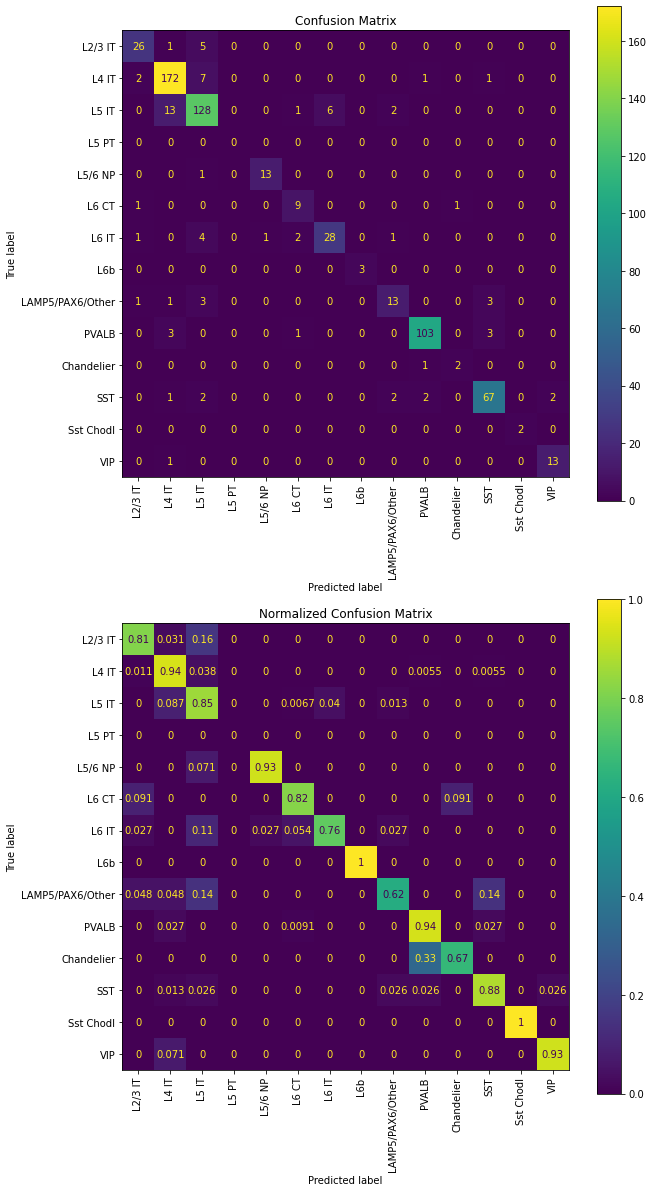

In [64]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(2,1, figsize=(10, 20))
ax[0].set_title('Confusion Matrix')

ConfusionMatrixDisplay.from_estimator(
    clf_full, X_std, y, labels=['L2/3 IT', 'L4 IT', 'L5 IT', 'L5 PT', 'L5/6 NP',
       'L6 CT', 'L6 IT', 'L6b', 'LAMP5/PAX6/Other', 'PVALB', 'Chandelier', 'SST',
       'Sst Chodl', 'VIP'], ax=ax[0])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)


ax[1].set_title('Normalized Confusion Matrix')

ConfusionMatrixDisplay.from_estimator(
    clf_full, X_std, y, labels=['L2/3 IT', 'L4 IT', 'L5 IT', 'L5 PT', 'L5/6 NP',
       'L6 CT', 'L6 IT', 'L6b', 'LAMP5/PAX6/Other', 'PVALB', 'Chandelier', 'SST',
       'Sst Chodl', 'VIP'], ax=ax[1], normalize ='true')

ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)


# Conf matrix looks better without regularization
# PV-Chand confusion much better when using 'multinomial' rather than 'ovr'

The classes with most representation also seem to be predicted well (leading to higher overall ROC?). But also maybe just because there is more data, so more accurate coeffs can be computed and results follow large numbers statistics. Because you didn't split test and training sets, this could be overfit.

In [65]:
from sklearn.metrics import classification_report

print(classification_report(y, clf_full.predict(X_std)))

                  precision    recall  f1-score   support

      Chandelier       0.67      0.67      0.67         3
         L2/3 IT       0.84      0.81      0.83        32
           L4 IT       0.90      0.94      0.92       183
           L5 IT       0.85      0.85      0.85       150
         L5/6 NP       0.93      0.93      0.93        14
           L6 CT       0.69      0.82      0.75        11
           L6 IT       0.82      0.76      0.79        37
             L6b       1.00      1.00      1.00         3
LAMP5/PAX6/Other       0.72      0.62      0.67        21
           PVALB       0.96      0.94      0.95       110
             SST       0.91      0.88      0.89        76
       Sst Chodl       1.00      1.00      1.00         2
             VIP       0.87      0.93      0.90        14

        accuracy                           0.88       656
       macro avg       0.86      0.86      0.86       656
    weighted avg       0.88      0.88      0.88       656



In [66]:
clf_full.coef_.shape    # classes x features
clf_full.coef_         # sparse when run with L1 penalty

array([[-0.06937618, -0.17980638, -0.14999212, ..., -0.16880581,
        -0.00881347, -0.1075265 ],
       [ 0.18981841, -0.25473851, -0.01465259, ..., -0.32465552,
         0.58807965,  0.07834119],
       [ 0.5793656 , -0.05147973, -0.18270822, ..., -0.34539452,
        -0.07246332,  0.16704659],
       ...,
       [-0.2673356 , -0.33672047,  0.21815995, ...,  0.90792633,
        -0.11384711, -0.34971717],
       [ 0.02677769,  0.32119108, -0.02854155, ...,  0.13942732,
        -0.06236186, -0.12198329],
       [-0.15529747, -0.21737875, -0.02966184, ...,  0.26598782,
         0.01157955,  0.0509902 ]])

In [67]:
# Pvals not implemented for sklearn.linear_model.LogisticRegression
# Adapted from https://stackoverflow.com/questions/25122999/scikit-learn-how-to-check-coefficients-significance
from scipy.stats import norm

def logit_pvalue(model, x, feat_n):
    """ Calculate z-scores for scikit-learn LogisticRegression.
    parameters:
        model: fitted sklearn.linear_model.LogisticRegression with intercept and large C
        x:     matrix on which the model was fit
    This function uses asymtptics for maximum likelihood estimates.
    """
    p = model.predict_proba(x)
    n = len(p)
    m = len(model.coef_[feat_n,:]) + 1 
    coefs = np.append(np.array(model.intercept_[feat_n]), np.array(model.coef_[feat_n,:]))
    x_full = np.matrix(np.insert(np.array(x), 0, 1, axis = 1))
    ans = np.zeros((m, m))
    for i in range(n):
        ans = ans + np.dot(np.transpose(x_full[i, :]), x_full[i, :]) * p[i,1] * p[i, 0]
    vcov = np.linalg.inv(np.matrix(ans))
    se = np.sqrt(np.diag(vcov))
    t =  coefs/se  
    p = (1 - norm.cdf(abs(t))) * 2
    return p

pvals = logit_pvalue(clf_full, X_std, 10)
pvals = pvals[1:]

In [68]:
# Above p-vals look wrong, maybe because assumes large C? nope, still weird without regularization
# Alternative
import statsmodels.api as sm
y_PV_or_not = y=='PVALB'
#X_std[inds,:].shape
#sm_model = sm.Logit(y_PV_or_not, sm.add_constant(X_std)).fit(disp=0)
sm_model = sm.Logit(y_PV_or_not.values, X_std, method='bfgs').fit()
print(sm_model.pvalues)
sm_model.summary()
#pvals = sm_model.pvalues[1:]
pvals = sm_model.pvalues
#conf = sm_model.conf_int[1]
# But here there is no regularization?

# In part we will get wonky results because these vars are all correlated

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/statsmodels/base/model.py:127: ValueWarning: unknown kwargs ['method']
  warnings.warn(msg, ValueWarning)
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1819: RuntimeWarning: overflow encountered in exp
  return 1/(1+np.exp(-X))
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/statsmodels/discrete/discrete_model.py:1872: RuntimeWarning: divide by zero encountered in log
  return np.sum(np.log(self.cdf(q*np.dot(X,params))))


         Current function value: inf
         Iterations: 35


LinAlgError: Singular matrix

In [69]:
np.argwhere(clf.classes_ == 'PVALB')

array([[9]])

In [70]:
d = {'Feature': imputer.feature_names_in_, 'Coeff': clf_full.coef_[10,:], 'Abs_coeff': np.abs(clf_full.coef_[10,:]), 'p-val': pvals}
df_PV = pd.DataFrame(d)
df_PV = df_PV.sort_values(by=['Abs_coeff'], ascending=False)

df_PV[0:20]
                     

,Feature,Coeff,Abs_coeff,p-val
16,tau,1.252910,1.252910,0.987784
12,fi_fit_slope,1.127381,1.127381,0.988293
59,upstroke_adapt_ratio,-1.074596,1.074596,0.991235
83,peak_ratio_chirp,0.953818,0.953818,0.990162
89,phase_peak_chirp,0.907926,0.907926,0.992106
3,upstroke_short_square,-0.806305,0.806305,0.998436
40,threshold_v_hero,0.768467,0.768467,0.998580
25,downstroke_rheo,-0.748587,0.748587,0.999041
13,vm_for_sag,-0.720242,0.720242,0.992729
53,adapt_mean,-0.658229,0.658229,0.990637


(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

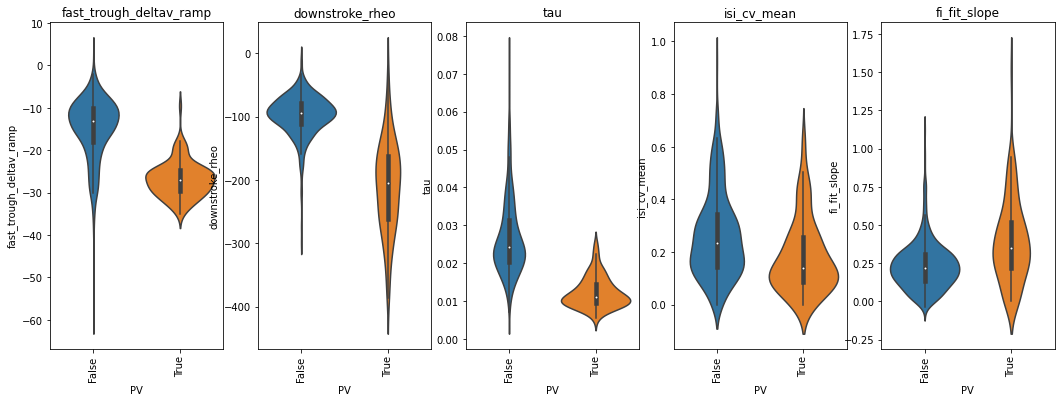

In [71]:
# Top features when run with outliers

df_ephys_sub['PV'] = (y =='PVALB')
df_X_std = pd.DataFrame(X_std, columns = imputer.feature_names_in_)
df_X_std['PV'] = (y =='PVALB')

fig2, axs = plt.subplots(1, 5, figsize=(18, 6))
plt.axes(axs[0])
sns.violinplot(data=df_ephys_sub, x='PV', y="fast_trough_deltav_ramp", ax=axs[0])
plt.title('fast_trough_deltav_ramp')
plt.xticks(rotation = 90)
#axs[0].set_xticklabels(axs[0].get_xticks(), rotation = 90)

plt.axes(axs[1])
sns.violinplot(data=df_ephys_sub, x='PV', y="downstroke_rheo", ax=axs[1])
plt.title('downstroke_rheo')
plt.xticks(rotation = 90)

plt.axes(axs[2])
sns.violinplot(data=df_ephys_sub, x='PV', y="tau", ax=axs[2])
plt.title('tau')
plt.xticks(rotation = 90)

plt.axes(axs[3])
sns.violinplot(data=df_ephys_sub, x='PV', y="isi_cv_mean", ax=axs[3])
plt.title('isi_cv_mean')
plt.xticks(rotation = 90)

plt.axes(axs[4])
sns.violinplot(data=df_ephys_sub, x='PV', y="fi_fit_slope", ax=axs[4])
plt.title('fi_fit_slope')
plt.xticks(rotation = 90)


# IS THIS FROM MULTINOMIAL?

(array([0, 1]), [Text(0, 0, 'False'), Text(1, 0, 'True')])

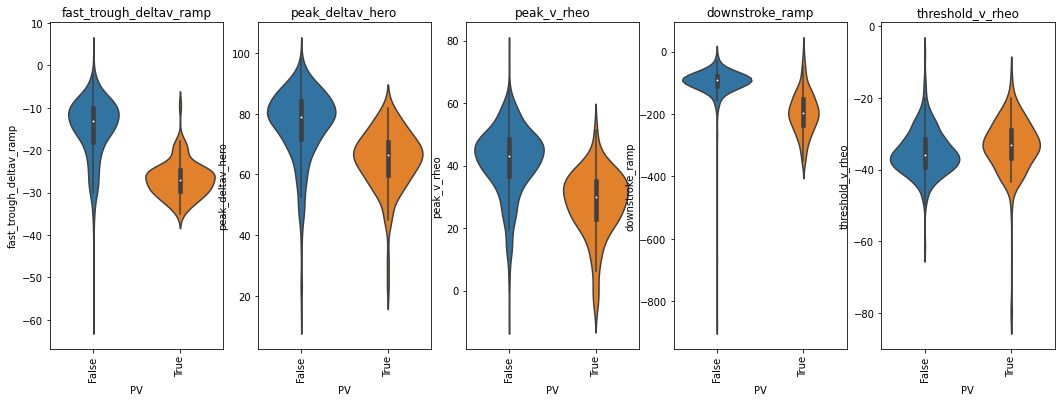

In [72]:
# Largest coeff features when run without outliers

df_ephys_sub['PV'] = y =='PVALB'

fig2, axs = plt.subplots(1, 5, figsize=(18, 6))
plt.axes(axs[0])
sns.violinplot(data=df_ephys_sub, x='PV', y="fast_trough_deltav_ramp", ax=axs[0])
plt.title('fast_trough_deltav_ramp')
plt.xticks(rotation = 90)
#axs[0].set_xticklabels(axs[0].get_xticks(), rotation = 90)

plt.axes(axs[1])
sns.violinplot(data=df_ephys_sub, x='PV', y="peak_deltav_hero", ax=axs[1])
plt.title('peak_deltav_hero')
plt.xticks(rotation = 90)

plt.axes(axs[2])
sns.violinplot(data=df_ephys_sub, x='PV', y="peak_v_rheo", ax=axs[2])
plt.title('peak_v_rheo')
plt.xticks(rotation = 90)

plt.axes(axs[3])
sns.violinplot(data=df_ephys_sub, x='PV', y="downstroke_ramp", ax=axs[3])
plt.title('downstroke_ramp')
plt.xticks(rotation = 90)

plt.axes(axs[4])
sns.violinplot(data=df_ephys_sub, x='PV', y="threshold_v_rheo", ax=axs[4])
plt.title('threshold_v_rheo')
plt.xticks(rotation = 90)

In [ ]:
# ALSO PLACE CRITERIA ON MIN NUMBER OF VALUES - if needed, if some only have a handful of values

In [73]:
def fisher_criterion(v1, v2):
    return abs(np.mean(v1) - np.mean(v2)) / (np.var(v1) + np.var(v2))
fish = []
for feat in df_ephys_sub.columns[:92]:
    fish.append(fisher_criterion (df_ephys_sub[feat][df_ephys_sub['PV']], df_ephys_sub[feat][~df_ephys_sub['PV']]))

In [74]:
d = {'Feature': imputer.feature_names_in_, 'Coeff': clf_full.coef_[10,:], 'Abs_coeff': np.abs(clf_full.coef_[10,:]), 'p-val': pvals, 'Fisher_cr': fish}
df_PV = pd.DataFrame(d)
df_PV = df_PV.sort_values(by=['Fisher_cr'], ascending=False)

df_PV[0:20]

#df_PV[df_PV['Feature'] == 'width_suprathresh_hero']['Fisher_cr']

#feat = 'width_suprathresh_hero'
#fisher_criterion (df_ephys_sub[feat][df_ephys_sub['PV']], df_ephys_sub[feat][~df_ephys_sub['PV']])

,Feature,Coeff,Abs_coeff,p-val,Fisher_cr
45,width_suprathresh_hero,0.050204,0.050204,0.999931,6172.282964
42,width_hero,0.018169,0.018169,0.999974,5298.059569
26,width_suprathresh_rheo,-0.228643,0.228643,0.999656,3127.688443
23,width_rheo,-0.332489,0.332489,0.999535,2371.704392
2,width_short_square,0.218160,0.218160,0.999019,336.537102
5,width_suprathresh_short_square,-0.201664,0.201664,0.999295,182.592106
77,width_suprathresh_ramp,-0.131803,0.131803,0.999825,151.200274
16,tau,1.252910,1.252910,0.987784,122.844556
34,latency_hero,0.545467,0.545467,0.993926,19.732279
63,ahp_delay_ratio_5spike,-0.497383,0.497383,0.993451,8.158453


([0, 1], [Text(0, 0, 'False'), Text(1, 0, 'True')])

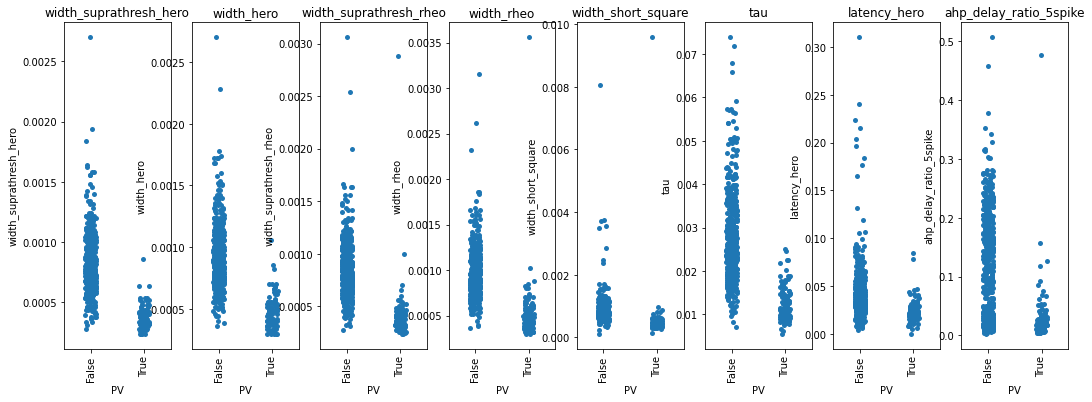

In [75]:
# As sorted by Fisher criterion

fig2, axs = plt.subplots(1, 8, figsize=(18, 6))
plt.axes(axs[0])
sns.stripplot(data=df_ephys_sub, x='PV', y="width_suprathresh_hero", ax=axs[0])
plt.title('width_suprathresh_hero')
plt.xticks(rotation = 90)
#axs[0].set_xticklabels(axs[0].get_xticks(), rotation = 90)

plt.axes(axs[1])
sns.stripplot(data=df_ephys_sub, x='PV', y="width_hero", ax=axs[1])
plt.title('width_hero')
plt.xticks(rotation = 90)

plt.axes(axs[2])
sns.stripplot(data=df_ephys_sub, x='PV', y="width_suprathresh_rheo", ax=axs[2])
plt.title('width_suprathresh_rheo')
plt.xticks(rotation = 90)

plt.axes(axs[3])
sns.stripplot(data=df_ephys_sub, x='PV', y="width_rheo", ax=axs[3])
plt.title('width_rheo')
plt.xticks(rotation = 90)

plt.axes(axs[4])
sns.stripplot(data=df_ephys_sub, x='PV', y="width_short_square", ax=axs[4])
plt.title('width_short_square')
plt.xticks(rotation = 90)

plt.axes(axs[5])
sns.stripplot(data=df_ephys_sub, x='PV', y="tau", ax=axs[5])
plt.title('tau')
plt.xticks(rotation = 90)

plt.axes(axs[6])
sns.stripplot(data=df_ephys_sub, x='PV', y="latency_hero", ax=axs[6])
plt.title('latency_hero')
plt.xticks(rotation = 90)

plt.axes(axs[7])
sns.stripplot(data=df_ephys_sub, x='PV', y="ahp_delay_ratio_5spike", ax=axs[7])
plt.title('ahp_delay_ratio_5spike')
plt.xticks(rotation = 90)

In [76]:
d = {'Feature': df_ephys_sub.columns[:92], 'Coeff': clf_full.coef_[10,:], 'Abs_coeff': np.abs(clf_full.coef_[10,:]), 'p-val': pvals}
df_PV2 = pd.DataFrame(d)
df_PV2 = df_PV2.sort_values(by=['p-val'], ascending=True)   # don't trust pvals when there is so much correlation between vars

df_PV2[0:20]

,Feature,Coeff,Abs_coeff,p-val
16,tau,1.252910,1.252910,0.987784
12,fi_fit_slope,1.127381,1.127381,0.988293
83,peak_ratio_chirp,0.953818,0.953818,0.990162
53,adapt_mean,-0.658229,0.658229,0.990637
9,sag_tau,0.610451,0.610451,0.990708
80,postap_slope_ramp,-0.623273,0.623273,0.991006
59,upstroke_adapt_ratio,-1.074596,1.074596,0.991235
89,phase_peak_chirp,0.907926,0.907926,0.992106
13,vm_for_sag,-0.720242,0.720242,0.992729
51,sag_area_depol,0.102568,0.102568,0.993013


In [77]:
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
# define dataset
# CAREFUL LDA HAS LOTS OF ASSUMPTIONS

# define model
model = LinearDiscriminantAnalysis()
# define model evaluation method
cv = RepeatedStratifiedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X_std, y, scoring='accuracy', cv=cv, n_jobs=-1)
# summarize result
print('Mean Accuracy: %.3f (%.3f)' % (np.mean(scores), np.std(scores)))


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(
/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


Mean Accuracy: 0.674 (0.042)


/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=10.
  warnings.warn(


In [78]:
fish_ovo = []

for feat in df_ephys_sub.columns[:92]:
    vals = []
    for pop1 in np.unique(y):
        for pop2 in np.unique(y):
            if pop1 == pop2:
                continue
            elif (np.sum(y==pop1)<3) or (np.sum(y==pop2)<3):
                continue
            else:
                #print(f'{pop1} vs. {pop2}')
                vals.append(fisher_criterion (df_ephys_sub[feat][y==pop1], df_ephys_sub[feat][y==pop2]))
    
    fish_ovo.append(vals)
len(fish_ovo)
# post feature selection make a UMAP showing ephys feature versus cluster

92

In [79]:
useful = []
i = 0
for feat in df_ephys_sub.columns[:92]:
    if np.sum(np.array(fish_ovo[i])>50):      # TRY RAISING THIS THRESHOLD - was 2
        useful.append(True)
        print(feat)
    else:
        useful.append(False)
    i+=1
sum(useful)

width_short_square
width_suprathresh_short_square
sag_tau
tau
width_rheo
width_suprathresh_rheo
adapt_hero
latency_hero
width_hero
width_suprathresh_hero
ahp_delay_ratio_hero
width_ramp
width_suprathresh_ramp
peak_ratio_chirp
sync_freq_chirp
phase_peak_chirp
total_inductive_phase_chirp


17

In [ ]:
Features on umap

Subset feature umap

Differential features by classes - show one vs rest, and high or low

In [80]:
# Decision tree classifier

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold

random_feat = np.random.choice(X_std.shape[1], sum(useful), replace=False)
#random_feat = np.random.choice(X_std.shape[1], 1, replace=False)
print(random_feat)

feature_cols = imputer.feature_names_in_
#feature_cols = imputer.feature_names_in_[useful]
feature_cols_rand = imputer.feature_names_in_[random_feat]
print(feature_cols)

kf =KFold(n_splits=5, shuffle=True, random_state=1)

perc_corr = []
for train_index, test_index in kf.split(X_std, y):
    # Create Decision Tree classifer object
    clf1 = DecisionTreeClassifier()

    # Train Decision Tree Classifer
    clf1 = clf1.fit(X_std[train_index],y[train_index])
    
    #Predict the response for test dataset
    y_pred = clf1.predict(X_std[test_index])
    
    perc_corr.append(sum(y_pred==y[test_index])/len(y[test_index]))
    
print("X_std:", np.mean(perc_corr))

perc_corr = []
for train_index, test_index in kf.split(X_imputed, y):
    # Create Decision Tree classifer object
    clf2 = DecisionTreeClassifier()

    # Train Decision Tree Classifer
    clf2 = clf2.fit(X_imputed[train_index],y[train_index])
    
    #Predict the response for test dataset
    y_pred = clf2.predict(X_imputed[test_index])
    
    perc_corr.append(sum(y_pred==y[test_index])/len(y[test_index]))

print("X_imputed:", np.mean(perc_corr))

perc_corr = []
for train_index, test_index in kf.split(X_imputed[:,useful], y):
    # Create Decision Tree classifer object
    clf3 = DecisionTreeClassifier()
    X_imputed_sub = X_imputed[:, useful]
    # Train Decision Tree Classifer
    clf3 = clf3.fit(X_imputed_sub[train_index],y[train_index])
    
    #Predict the response for test dataset
    y_pred = clf3.predict(X_imputed_sub[test_index])
    
    perc_corr.append(sum(y_pred==y[test_index])/len(y[test_index]))

print("X_imputed, 'useful' only:", np.mean(perc_corr))

perc_corr = []
for train_index, test_index in kf.split(X_imputed[:,random_feat], y):
    # Create Decision Tree classifer object
    clf4 = DecisionTreeClassifier()
    X_imputed_sub = X_imputed[:, random_feat]
    print(X_imputed_sub.shape)
    # Train Decision Tree Classifer
    clf4 = clf4.fit(X_imputed_sub[train_index],y[train_index])
    
    #Predict the response for test dataset
    y_pred = clf4.predict(X_imputed_sub[test_index])
    
    perc_corr.append(sum(y_pred==y[test_index])/len(y[test_index]))

print("X_imputed, random subset features:", np.mean(perc_corr))

# 14 subclasses

# Using all features: accuracy without train-test split: 0.9869848156182213
# Using "useful" features: 0.9869848156182213
# Using 44 random features:

# Using x_imputed because interpretation is much more natural and performance is the same

# Crossvalidation

# Try subsetting to the "useful" features above

# ARE THESE FOR MULTINOMIAL BUT SHOWING PLOTS ONLY FOR PV vs. Non?

[56 90  5  9 78 14 85 10 31 20 19 47 64 46  0 65 74]
['upstroke_downstroke_ratio_short_square' 'threshold_v_short_square'
 'width_short_square' 'upstroke_short_square' 'downstroke_short_square'
 'width_suprathresh_short_square' 'peak_deltav_short_square' 'sag'
 'sag_area' 'sag_tau' 'v_baseline' 'rheobase_i' 'fi_fit_slope'
 'vm_for_sag' 'input_resistance' 'input_resistance_ss' 'tau'
 'latency_rheo' 'avg_rate_rheo' 'mean_isi_rheo'
 'upstroke_downstroke_ratio_rheo' 'threshold_v_rheo' 'peak_v_rheo'
 'width_rheo' 'upstroke_rheo' 'downstroke_rheo' 'width_suprathresh_rheo'
 'trough_v_rheo' 'fast_trough_v_rheo' 'postap_slope_rheo'
 'fast_trough_v_last_rheo' 'adp_v_last_rheo' 'adapt_hero' 'avg_rate_hero'
 'latency_hero' 'mean_isi_hero' 'median_isi_hero' 'isi_cv_hero'
 'ir_late_hero' 'upstroke_downstroke_ratio_hero' 'threshold_v_hero'
 'peak_v_hero' 'width_hero' 'upstroke_hero' 'downstroke_hero'
 'width_suprathresh_hero' 'trough_v_hero' 'fast_trough_v_hero'
 'postap_slope_hero' 'ahp_delay_ratio_

['Chandelier' 'L2/3 IT' 'L4 IT' 'L5 IT' 'L5/6 NP' 'L6 CT' 'L6 IT' 'L6b'
 'LAMP5/PAX6/Other' 'PVALB' 'SST' 'Sst Chodl' 'VIP']


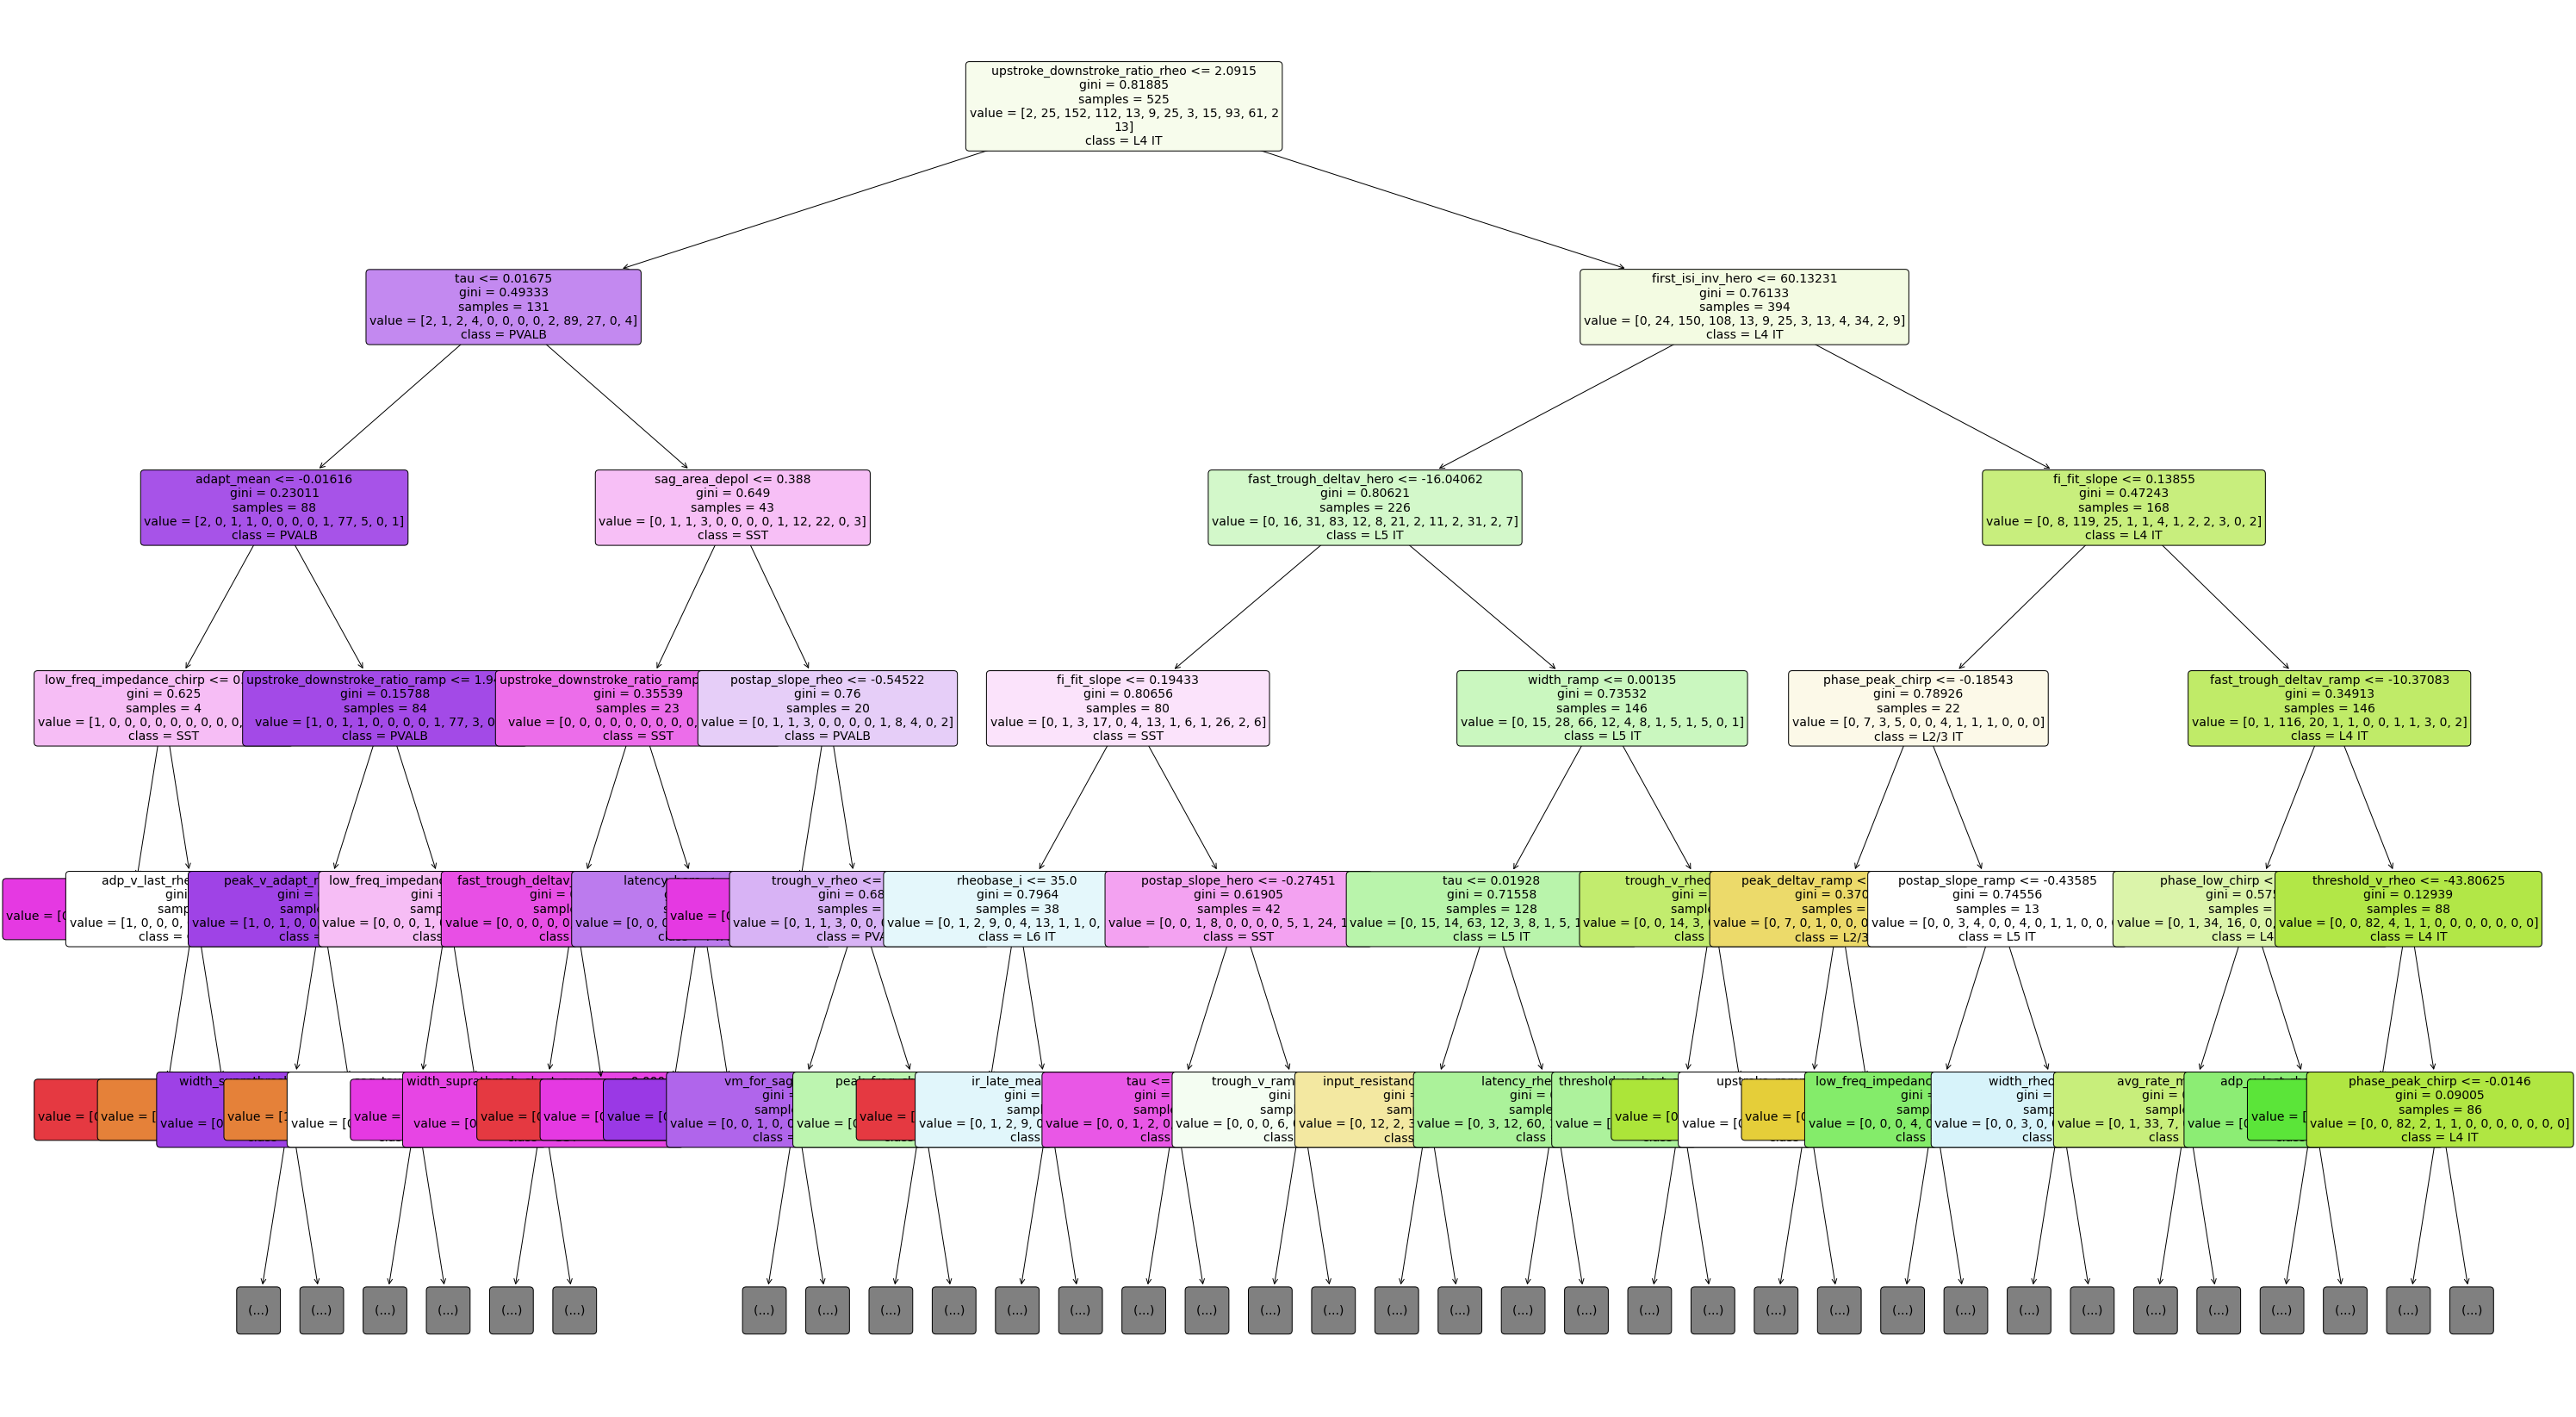

In [81]:
fig = plt.figure(figsize=(50,30))
class_names = clf2.classes_

_ = plot_tree(clf2, 
                   feature_names=feature_cols,
                   max_depth = 5,
                   filled=True,
                   fontsize = 14,
                   class_names = class_names,
                   #proportion=True
                   precision=5,
                   rounded=True)



fig.savefig("decision_tree.png", dpi=300)
print(class_names)

# These are the standardized value

# TRY PCA FIRST?

# Label is predominant class in that branch

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12],
 [Text(0, 0, 'PVALB'),
  Text(1, 0, 'L5 IT'),
  Text(2, 0, 'L2/3 IT'),
  Text(3, 0, 'LAMP5/PAX6/Other'),
  Text(4, 0, 'L4 IT'),
  Text(5, 0, 'L6 IT'),
  Text(6, 0, 'SST'),
  Text(7, 0, 'L5/6 NP'),
  Text(8, 0, 'Chandelier'),
  Text(9, 0, 'VIP'),
  Text(10, 0, 'L6 CT'),
  Text(11, 0, 'L6b'),
  Text(12, 0, 'Sst Chodl')])

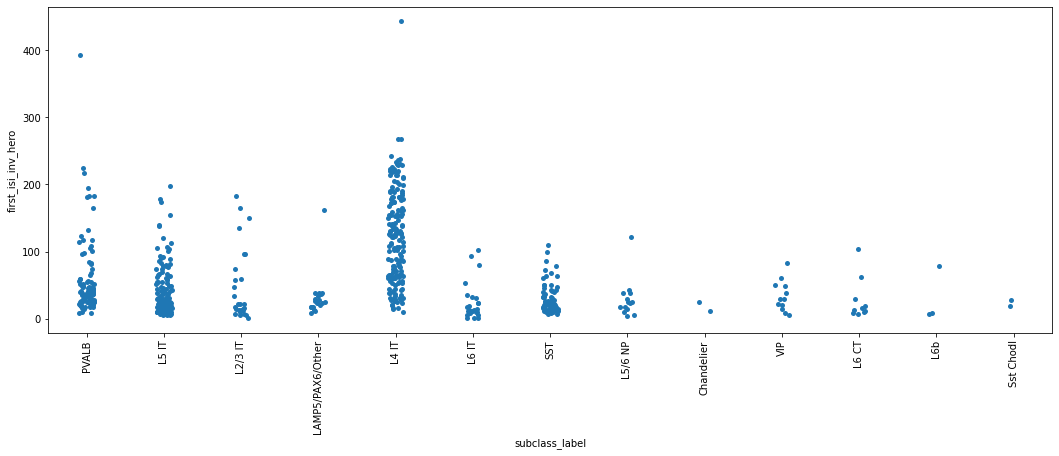

In [82]:
fig,ax = plt.subplots(figsize=(18, 6))
#feat = 'width_suprathresh_rheo'
#feat = 'tau'
feat = 'first_isi_inv_hero'
sns.stripplot(data=df3_filt, x="subclass_label", y=feat, ax=ax)
plt.xticks(rotation = 90)

In [84]:
clf2.classes_

array(['Chandelier', 'L2/3 IT', 'L4 IT', 'L5 IT', 'L5/6 NP', 'L6 CT',
       'L6 IT', 'L6b', 'LAMP5/PAX6/Other', 'PVALB', 'SST', 'Sst Chodl',
       'VIP'], dtype=object)

In [87]:
importance = clf2.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
#    feat_name = feature_cols[i]
#    print('Feature: %s, Score: %.5f' % (feat_name,v))
    
d = {'Feature': imputer.feature_names_in_, 'Feature_importance': importance}
#d = {'Feature': feature_cols, 'Feature_importance': importance}
df_dec_impo = pd.DataFrame(d)
df_dec_impo = df_dec_impo.sort_values(by=['Feature_importance'], ascending=False)
df_dec_impo.head(15)

# plot feature importance
#plt.bar([x for x in range(len(importance))], importance)
#plt.show()

# first_isi_inv_hero is not in the list of 44 features that are useful supposedly

,Feature,Feature_importance
20,upstroke_downstroke_ratio_rheo,0.153195
71,first_isi_inv_hero,0.096627
16,tau,0.073175
12,fi_fit_slope,0.045261
55,ir_late_mean,0.031643
72,upstroke_downstroke_ratio_ramp,0.028043
67,fast_trough_deltav_hero,0.024214
27,trough_v_rheo,0.021771
74,width_ramp,0.021597
15,input_resistance_ss,0.018899


([0, 1, 2, 3, 4, 5],
 [Text(0, 0, 'PVALB'),
  Text(1, 0, 'LAMP5/PAX6/Other'),
  Text(2, 0, 'SST'),
  Text(3, 0, 'Chandelier'),
  Text(4, 0, 'VIP'),
  Text(5, 0, 'Sst Chodl')])

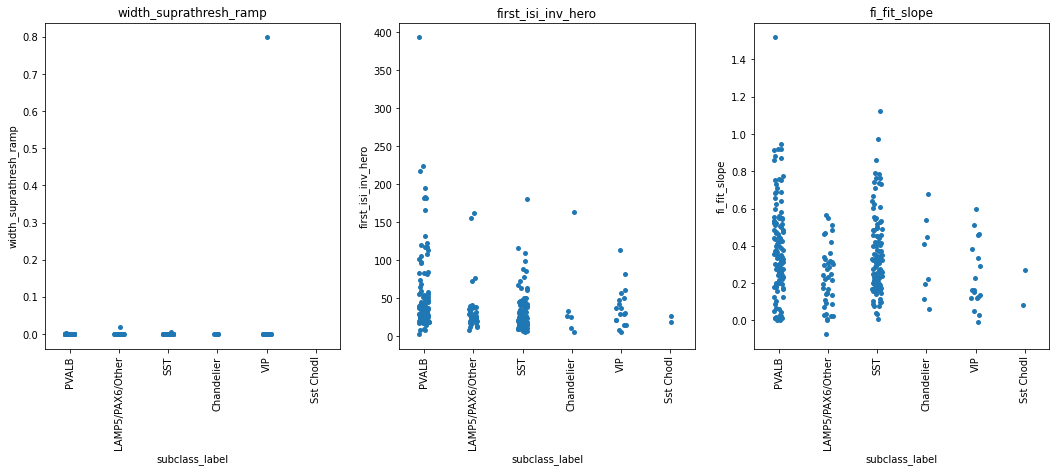

In [88]:
# As sorted by Random Forest Classifier feature importance
# Note decision tree methods don't do great when there are lots of features, many of which may not be useful

fig3, axs = plt.subplots(1, 3, figsize=(18, 6))

plt.axes(axs[0])
sns.stripplot(data=df_ephys_sub_I, x="subclass_label", y="width_suprathresh_ramp", ax=axs[0])
plt.title('width_suprathresh_ramp')
plt.xticks(rotation = 90)

plt.axes(axs[1])
sns.stripplot(data=df_ephys_sub_I, x="subclass_label", y="first_isi_inv_hero", ax=axs[1])
plt.title('first_isi_inv_hero')
plt.xticks(rotation = 90)

plt.axes(axs[2])
sns.stripplot(data=df_ephys_sub_I, x="subclass_label", y="fi_fit_slope", ax=axs[2])
plt.title('fi_fit_slope')
plt.xticks(rotation = 90)

In [89]:
from sklearn.tree import export_graphviz
from six import StringIO
from IPython.display import Image  
import pydotplus

dot_data = StringIO()
export_graphviz(clf, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('diabetes.png')
Image(graph.create_png())



AttributeError: 'LogisticRegression' object has no attribute 'tree_'

In [90]:
X_std_df = pd.DataFrame(X_std)
X_std_df.columns = df_ephys_sub.columns[:92]

In [91]:
from sklearn.decomposition import SparsePCA

transformer = SparsePCA(random_state=0, alpha= 0.045,ridge_alpha=1e-4)
#transformer = SparsePCA(n_components=41, random_state=0, alpha= 5,ridge_alpha=1e-4)
transformer.fit(X_std_df)
# Try with different random_state?

#feature_names_in_ndarray of shape (n_features_in_,)
#Names of features seen during fit. Defined only when X has feature names that are all strings.

KeyboardInterrupt: 

In [174]:
print(np.nonzero(transformer.components_[0]))
print(np.nonzero(transformer.components_[1]))
print(np.nonzero(transformer.components_[2]))

(array([ 4, 23, 25, 26, 42, 44, 76]),)
(array([15]),)
(array([21, 40, 68, 73]),)


In [92]:
#transformer.get_feature_names_out(df_ephys_sub.columns[:92])    # NOT WORKING
feat_names = df_ephys_sub.columns[:92]
#feat_names[[26,45,76]]
#feat_names[[4,23,25,26,42,44,76]]
feat_names[[ 0,  4, 20, 25, 39, 44, 72, 76, 80, 81, 85]]

Index(['upstroke_downstroke_ratio_short_square', 'downstroke_short_square',
       'upstroke_downstroke_ratio_rheo', 'downstroke_rheo',
       'upstroke_downstroke_ratio_hero', 'downstroke_hero',
       'upstroke_downstroke_ratio_ramp', 'downstroke_ramp',
       'postap_slope_ramp', 'fast_trough_deltav_ramp', '3db_freq_chirp'],
      dtype='object')

In [93]:
feat_names[[ 3,  4,  6, 24, 25, 43, 44, 65, 75, 76, 80, 85]]

Index(['upstroke_short_square', 'downstroke_short_square',
       'peak_deltav_short_square', 'upstroke_rheo', 'downstroke_rheo',
       'upstroke_hero', 'downstroke_hero', 'trough_slowdeltav_hero',
       'upstroke_ramp', 'downstroke_ramp', 'postap_slope_ramp',
       '3db_freq_chirp'],
      dtype='object')

In [167]:
feat_names[[ 6, 22, 24, 41, 68, 69, 75, 82]]

Index(['peak_deltav_short_square', 'peak_v_rheo', 'upstroke_rheo',
       'peak_v_hero', 'peak_deltav_rheo', 'peak_deltav_hero', 'upstroke_ramp',
       'peak_deltav_ramp'],
      dtype='object')

In [176]:
X_transformed = transformer.transform(X_std)
X_transformed.shape

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but SparsePCA was fitted with feature names
  warnings.warn(


(741, 92)

41
0.49278987669918295


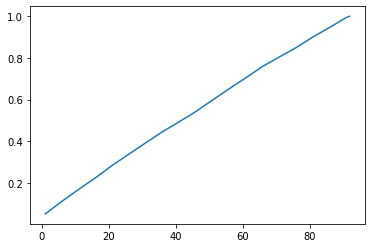

In [177]:
# In this implementation, orthogonality of components is not imposed
# because two components can share some explained variance so they are not additive, and furthermore the total explained variance should be less than 100% of the original input variance even when n_components == n_features because of the l1 penalty.
# But there may be a way to compute the cumulative variance explained, as below

# Based on: https://github.com/scikit-learn/scikit-learn/issues/11512
# https://arxiv.org/abs/1907.03989

num_comp = list(range(1, 92, 5))
num_comp.append(92)
frac = []

for n in num_comp:

    P = transformer.components_[0:n]  # loadings
    P = P.T
    #T = X_transformed  # score
    T = X_std @ P @ np.linalg.pinv(P.T @ P)
    #Xc = X_std - X_std.mean(axis=0)  # center data   # Already centered

    explained_variance = np.trace(P @ T.T @ T @ P.T)     # @ is matrix multiplication
    total_variance = np.trace(X_std.T @ X_std)
    frac.append(explained_variance / total_variance)
    #print('Fraction explained variance:', explained_variance / total_variance)
    
plt.plot(num_comp,frac)
print(num_comp[8])
print(frac[8])

In [178]:
sum(transformer.components_[0]**2)
# Normalized already

0.9999999999999999

In [94]:
from scipy.stats import pearsonr
print(feat_names[84])
print(feat_names[4])
corr, pval = pearsonr(X_std[:,84], X_std[:,4])
print(corr)
print(pval)

peak_freq_chirp
downstroke_short_square
-0.6277679475985197
3.483540699232166e-73


In [95]:
print(feat_names[23])
print(feat_names[42])
corr, pval = pearsonr(X_std[:,23], X_std[:,42])
print(corr)
print(pval)

width_rheo
width_hero
0.9712664123825053
0.0


In [154]:
print(feat_names[84])
print(feat_names[42])
corr, pval = pearsonr(X_std[:,84], X_std[:,42])
print(corr)
print(pval)

peak_freq_chirp
width_hero
-0.33451369483805865
7.857615090760604e-21


In [179]:
# Adjusted percent variance explained, based on: https://github.com/AllenInstitute/drcme/blob/master/drcme/spca.py
# and https://stats.stackexchange.com/questions/439078/how-is-explained-variance-in-sparse-pca-calculated
u, d, v = np.linalg.svd(X_std, full_matrices=False)
totalvariance = (d ** 2).sum()
    
Z = X_std.dot(transformer.components_)   # Try using @ instead
q, R = np.linalg.qr(Z)
pev = np.diag(R ** 2) / totalvariance
pev


array([1.12783871e-02, 1.08676799e-02, 1.01118808e-02, 1.01332624e-02,
       9.44708713e-03, 6.92855693e-03, 7.83396942e-03, 7.78118632e-03,
       3.00921989e-03, 9.74216396e-03, 7.29411260e-03, 5.81773035e-03,
       5.71412879e-03, 7.90390236e-03, 7.90541702e-03, 6.80370092e-03,
       5.97322454e-04, 2.57723685e-03, 1.90048032e-03, 1.50549703e-03,
       8.28541122e-03, 2.81589137e-03, 2.19029369e-03, 1.15527736e-03,
       1.30874544e-03, 8.56375365e-04, 7.12418292e-04, 6.47030876e-03,
       3.40167559e-03, 2.56433329e-03, 3.21189211e-03, 5.92438803e-04,
       4.19067689e-04, 2.69014430e-04, 7.44515024e-04, 1.10684342e-03,
       4.13993192e-03, 9.88036107e-03, 4.87164976e-03, 2.19636847e-03,
       4.65186911e-04, 1.01473141e-03, 3.93018425e-04, 6.59899198e-04,
       2.24717075e-04, 5.46387414e-04, 1.52374896e-03, 2.28904848e-06,
       4.78070710e-03, 4.54388759e-03, 5.04312243e-03, 6.69295634e-03,
       3.36478893e-03, 1.11350714e-02, 1.05785684e-03, 3.15478120e-03,
      

In [192]:
print(sum(pev))

0.3101550519128565


In [190]:
order = np.flipud(np.argsort(pev))
order

array([ 0, 53,  1,  3,  2, 37,  9,  4, 84, 20, 83, 14, 13,  6,  7, 10,  5,
       15, 51, 27, 64, 79, 11, 12, 50, 38, 48, 56, 49, 36, 70, 58, 57, 86,
       28, 71, 52, 30, 55,  8, 60, 75, 21, 76, 17, 29, 39, 22, 59, 18, 63,
       46, 19, 88, 24, 85, 23, 35, 54, 41, 25, 78, 34, 66, 26, 43, 87, 16,
       31, 45, 81, 40, 32, 42, 74, 90, 62, 72, 61, 77, 68, 33, 44, 82, 73,
       69, 89, 80, 65, 91, 67, 47])

In [184]:
print(np.nonzero(transformer.components_[53]))

(array([70]),)


In [199]:
feat_names[[70]]

Index(['first_isi_inv_rheo'], dtype='object')

In [193]:
print(np.nonzero(transformer.components_[37]))

(array([38, 55]),)


In [194]:
feat_names[[38,55]]

Index(['ir_late_hero', 'ir_late_mean'], dtype='object')

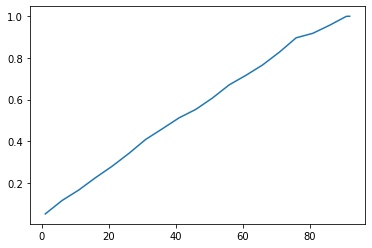

In [191]:
num_comp = list(range(1, 92, 5))
num_comp.append(92)
frac = []

comps_sorted = transformer.components_[order]

for n in num_comp:

    P = comps_sorted[0:n]  # loadings
    P = P.T
    #T = X_transformed  # score
    T = X_std @ P @ np.linalg.pinv(P.T @ P)
    #Xc = X_std - X_std.mean(axis=0)  # center data   # Already centered

    explained_variance = np.trace(P @ T.T @ T @ P.T)     # @ is matrix multiplication
    total_variance = np.trace(X_std.T @ X_std)
    frac.append(explained_variance / total_variance)
    #print('Fraction explained variance:', explained_variance / total_variance)
    
plt.plot(num_comp,frac)

In [196]:
X_std_df.to_feather('X_std.feather')
# Process then in R elasticnet implementation

In [96]:
df_spca = pd.read_feather('spca_19comps.feather')
sums = df_spca.abs().sum(axis=0)

df_spca = df_spca.drop(df_spca.columns[sums==0],axis = 1)

In [97]:
print(feat_names[np.nonzero(df_spca.iloc[:,0].values)])
comp_names = ['width']

Index(['downstroke_short_square', 'width_rheo', 'downstroke_rheo',
       'width_suprathresh_rheo', 'width_hero', 'downstroke_hero',
       'width_suprathresh_hero', 'width_ramp', 'downstroke_ramp',
       'width_suprathresh_ramp'],
      dtype='object')


In [98]:
print(feat_names[np.nonzero(df_spca.iloc[:,1].values)])
comp_names.append('peak_v')

Index(['upstroke_downstroke_ratio_short_square', 'peak_deltav_short_square',
       'upstroke_downstroke_ratio_rheo', 'peak_v_rheo', 'peak_v_hero',
       'peak_deltav_rheo', 'peak_deltav_hero',
       'upstroke_downstroke_ratio_ramp', 'upstroke_ramp', 'peak_deltav_ramp'],
      dtype='object')


In [99]:
print(feat_names[np.nonzero(df_spca.iloc[:,2].values)])
comp_names.append('trough_v')

Index(['threshold_v_short_square', 'threshold_v_rheo', 'trough_v_rheo',
       'fast_trough_v_rheo', 'fast_trough_v_last_rheo', 'adp_v_last_rheo',
       'threshold_v_hero', 'fast_trough_v_hero', 'trough_v_ramp'],
      dtype='object')


In [100]:
print(feat_names[np.nonzero(df_spca.iloc[:,3].values)])
comp_names.append('fast_trough_deltav-first_isi_inv')

Index(['ahp_delay_ratio_5spike', 'fast_trough_deltav_rheo',
       'fast_trough_deltav_hero', 'first_isi_inv_hero',
       'fast_trough_deltav_ramp'],
      dtype='object')


In [101]:
print(feat_names[np.nonzero(df_spca.iloc[:,4].values)])
comp_names.append('input_resistance')

Index(['vm_for_sag', 'input_resistance', 'input_resistance_ss',
       'threshold_i_ramp', 'peak_impedance_chirp', 'low_freq_impedance_chirp',
       'phase_low_chirp'],
      dtype='object')


In [102]:
print(feat_names[np.nonzero(df_spca.iloc[:,5].values)])
comp_names.append('adapt')

Index(['width_adapt_ratio', 'upstroke_adapt_ratio', 'downstroke_adapt_ratio',
       'threshold_v_adapt_ratio'],
      dtype='object')


In [103]:
print(feat_names[np.nonzero(df_spca.iloc[:,6].values)])
comp_names.append('mean_isi')

Index(['mean_isi_hero', 'median_isi_hero'], dtype='object')


In [104]:
print(feat_names[np.nonzero(df_spca.iloc[:,7].values)])
comp_names.append('isi')

Index(['mean_isi_rheo', 'first_isi_inv_rheo'], dtype='object')


In [105]:
print(feat_names[np.nonzero(df_spca.iloc[:,8].values)])
comp_names.append('avg_rate_rheo')

Index(['avg_rate_rheo'], dtype='object')


In [106]:
print(feat_names[np.nonzero(df_spca.iloc[:,9].values)])
comp_names.append('freq_chirp')

Index(['peak_freq_chirp', 'sync_freq_chirp'], dtype='object')


In [107]:
print(feat_names[np.nonzero(df_spca.iloc[:,10].values)])
comp_names.append('phase_peak_chirp')

Index(['phase_peak_chirp'], dtype='object')


In [108]:
print(feat_names[np.nonzero(df_spca.iloc[:,11].values)])
comp_names.append('sag_depol')

Index(['sag_depol'], dtype='object')


In [109]:
print(feat_names[np.nonzero(df_spca.iloc[:,12].values)])
comp_names.append('width_suprathresh_short_square')

Index(['width_suprathresh_short_square'], dtype='object')


In [110]:
print(feat_names[np.nonzero(df_spca.iloc[:,13].values)])
comp_names.append('rheobase_i')

Index(['rheobase_i'], dtype='object')


In [111]:
print(feat_names[np.nonzero(df_spca.iloc[:,14].values)])
comp_names.append('sag')

Index(['sag', 'sag_area'], dtype='object')


In [112]:
print(feat_names[np.nonzero(df_spca.iloc[:,15].values)])
comp_names.append('sag_tau')

Index(['sag_tau'], dtype='object')


In [113]:
print(feat_names[np.nonzero(df_spca.iloc[:,16].values)])
comp_names.append('sag_tau_depol')

Index(['sag_tau_depol'], dtype='object')


In [114]:
print(feat_names[71])
print(feat_names[81])
corr, pval = pearsonr(X_std[:,71], X_std[:,81])
print(corr)
print(pval)

first_isi_inv_hero
fast_trough_deltav_ramp
0.44914504908617925
6.946683627722089e-34


In [115]:
print(feat_names[71])
print(feat_names[81])
corr, pval = pearsonr(X_std[:,71], X_std[:,81])
print(corr)
print(pval)

first_isi_inv_hero
fast_trough_deltav_ramp
0.44914504908617925
6.946683627722089e-34


In [116]:
# Decision tree classifier

from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

feature_cols = comp_names
print(feature_cols)

X_transformed = X_std @ df_spca.values
X = X_transformed
#X = X_std

n_splits = 5
kf =KFold(n_splits=n_splits, shuffle=True, random_state=1)

perc_corr = []
subclasses = list(np.unique(y))
f1_cv = np.full((n_splits, len(subclasses)), fill_value=np.nan)

i_cv = 0
for train_index, test_index in kf.split(X, y):
    # Create classifer object
    clf1 = RandomForestClassifier()

    # Train classifer
    clf1 = clf1.fit(X[train_index],y[train_index])
    
    #Predict the response for test dataset
    y_pred = clf1.predict(X[test_index])
    
    perc_corr.append(sum(y_pred==y[test_index])/len(y[test_index]))
    
    f1 = f1_score(y[test_index], y_pred, average=None)
    print(i_cv)

    for i in range(len(f1)):
        j = subclasses.index(clf1.classes_[i])
        f1_cv[i_cv, j] = f1[i]
    i_cv += 1
    
print("X_std:", np.mean(perc_corr))

clf1 = RandomForestClassifier()
clf1 = clf1.fit(X,y)
y_pred = clf1.predict(X)
f1 = f1_score(y, y_pred, average=None)
df_f1 = pd.DataFrame(clf1.classes_,f1)

f1_cv = np.nanmean(f1_cv, axis=0)
df_f1_cv = pd.DataFrame(subclasses,f1_cv)
df_f1_cv

['width', 'peak_v', 'trough_v', 'fast_trough_deltav-first_isi_inv', 'input_resistance', 'adapt', 'mean_isi', 'isi', 'avg_rate_rheo', 'freq_chirp', 'phase_peak_chirp', 'sag_depol', 'width_suprathresh_short_square', 'rheobase_i', 'sag', 'sag_tau', 'sag_tau_depol']
0
1
2
3
4
X_std: 0.6401919962988665


,0
0.194805,Chandelier
0.565805,L2/3 IT
0.688008,L4 IT
0.369131,L5 IT
0.000000,L5/6 NP
0.028571,L6 CT
0.183333,L6 IT
0.303810,L6b
0.608508,LAMP5/PAX6/Other
0.533944,PVALB


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.2s remaining:    0.0s


[CV] START .....................................................................
[CV] END ................................ score: (test=0.631) total time=   0.2s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.655) total time=   0.2s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.655) total time=   0.2s
[CV] START .....................................................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.4s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.6s remaining:    0.0s


[CV] END ................................ score: (test=0.608) total time=   0.2s
[CV] START .....................................................................
[CV] END ................................ score: (test=0.547) total time=   0.2s
0.6194177398875386 0.04012655303934468


[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.8s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.9s finished


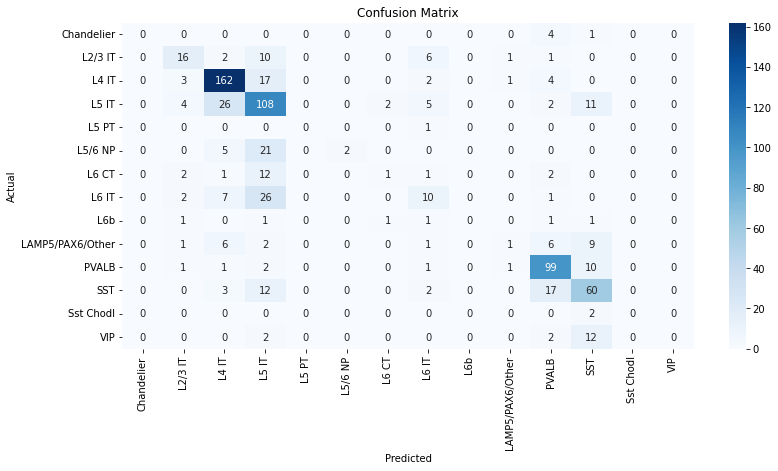

In [387]:
# From: https://towardsdatascience.com/how-to-plot-a-confusion-matrix-from-a-k-fold-cross-validation-b607317e9874
from sklearn.model_selection import KFold, cross_val_score
from typing import Tuple
import copy as cp
from sklearn.metrics import confusion_matrix

model = RandomForestClassifier(random_state=42)
kfold = KFold(n_splits=5, random_state=42, shuffle=True)

cv_results = cross_val_score(model, X, y, cv=kfold, scoring='accuracy', verbose=10)

print(cv_results.mean(), cv_results.std())

def cross_val_predict(model, kfold : KFold, X : np.array, y : np.array) -> Tuple[np.array, np.array, np.array]:

    model_ = cp.deepcopy(model)
    
    no_classes = len(np.unique(y))
    
    actual_classes = np.empty([0], dtype=int)
    predicted_classes = np.empty([0], dtype=int)
    predicted_proba = np.empty([0, no_classes]) 

    for train_ndx, test_ndx in kfold.split(X):

        train_X, train_y, test_X, test_y = X[train_ndx], y[train_ndx], X[test_ndx], y[test_ndx]

        actual_classes = np.append(actual_classes, test_y)

        model_.fit(train_X, train_y)
        predicted_classes = np.append(predicted_classes, model_.predict(test_X))

        try:
            predicted_proba = np.append(predicted_proba, model_.predict_proba(test_X), axis=0)
        except:
            predicted_proba = np.append(predicted_proba, np.zeros((len(test_X), no_classes), dtype=float), axis=0)

    return actual_classes, predicted_classes, predicted_proba

def plot_confusion_matrix(actual_classes : np.array, predicted_classes : np.array, sorted_labels : list):

    matrix = confusion_matrix(actual_classes, predicted_classes, labels=sorted_labels)
    
    plt.figure(figsize=(12.8,6))
    sns.heatmap(matrix, annot=True, xticklabels=sorted_labels, yticklabels=sorted_labels, cmap="Blues", fmt="g")
    plt.xlabel('Predicted'); plt.ylabel('Actual'); plt.title('Confusion Matrix')

    plt.show()
    
actual_classes, predicted_classes, _ = cross_val_predict(model, kfold, X, y)
plot_confusion_matrix(actual_classes, predicted_classes, subclasses)


In [319]:
importance = clf1.feature_importances_
# summarize feature importance
#for i,v in enumerate(importance):
#    feat_name = feature_cols[i]
#    print('Feature: %s, Score: %.5f' % (feat_name,v))
    
d = {'Feature': comp_names, 'Feature_importance': importance}
#d = {'Feature': feature_cols, 'Feature_importance': importance}
df_dec_impo = pd.DataFrame(d)
df_dec_impo = df_dec_impo.sort_values(by=['Feature_importance'], ascending=False)
df_dec_impo.head(15)

,Feature,Feature_importance
3,fast_trough_deltav-first_isi_inv,0.129729
0,width,0.099603
12,width_suprathresh_short_square,0.079860
7,isi,0.076636
1,peak_v,0.064919
14,sag,0.061781
4,input_resistance,0.060028
6,mean_isi,0.054594
9,freq_chirp,0.053932
11,sag_depol,0.051566


['width', 'peak_v', 'trough_v', 'fast_trough_deltav-first_isi_inv', 'input_resistance', 'adapt', 'mean_isi', 'isi', 'avg_rate_rheo', 'freq_chirp', 'phase_peak_chirp', 'sag_depol', 'width_suprathresh_short_square', 'rheobase_i', 'sag', 'sag_tau', 'sag_tau_depol']
Test 0.4923779782558409
Train 0.5316357688113412
Test 0.5091256072172102
Train 0.5888004362050164
Test 0.5243233865371271
Train 0.6337666303162486
Test 0.5502660189683091
Train 0.6932155579789168
Test 0.5670367800138794
Train 0.759528171573973
Test 0.5472472819801064
Train 0.8239323882224646
Test 0.5380985426786953
Train 0.8814801890221737
Test 0.5152209114041175
Train 0.9184507451835696
Test 0.5137288919731666
Train 0.946651399491094
Test 0.5228660652324775
Train 0.988948745910578
Test 0.5137520240573675
Train 0.9897106506724827


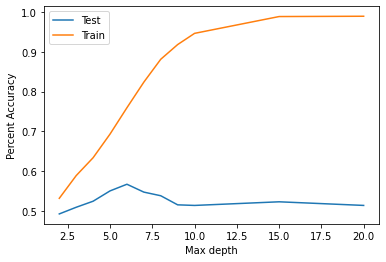

Best: 6


,0
1.000000,Chandelier
0.984127,L2/3 IT
0.994505,L4 IT
0.996656,L5 IT
1.000000,L5/6 NP
1.000000,L6 CT
1.000000,L6 IT
1.000000,L6b
0.975610,LAMP5/PAX6/Other
0.969163,PVALB


In [243]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import f1_score

feature_cols = comp_names
print(feature_cols)

X_transformed = X_std @ df_spca.values
X = X_transformed
#X = X_std

n_splits = 5
kf =KFold(n_splits=n_splits, shuffle=True, random_state=1)

max_depth_list = [2,3,4,5,6,7,8,9,10,15,20]
perc_corr_test_md = []
perc_corr_train_md = []

for md in max_depth_list:
    perc_corr_test = []
    perc_corr_train = []

    for train_index, test_index in kf.split(X, y):
        # Create classifer object
        clf2 = DecisionTreeClassifier(max_depth=md)

        # Train classifer
        clf2 = clf2.fit(X[train_index],y[train_index])

        #Predict the response for test dataset
        y_pred = clf2.predict(X[test_index])
        y_pred_train = clf2.predict(X[train_index])

        perc_corr_test.append(sum(y_pred==y[test_index])/len(y[test_index]))
        perc_corr_train.append(sum(y_pred_train == y[train_index])/len(y[train_index]))

    print("Test", np.mean(perc_corr_test))
    print("Train", np.mean(perc_corr_train))
    perc_corr_test_md.append(np.mean(perc_corr_test))
    perc_corr_train_md.append(np.mean(perc_corr_train))

plt.plot(max_depth_list, perc_corr_test_md)
plt.plot(max_depth_list, perc_corr_train_md)
plt.xlabel("Max depth")
plt.ylabel("Percent Accuracy")
plt.legend(["Test", "Train"])
plt.show()
print("Best:", max_depth_list[np.argmax(perc_corr_test_md)])

clf2 = DecisionTreeClassifier()
clf2 = clf2.fit(X,y)
y_pred = clf2.predict(X)
f1 = f1_score(y, y_pred, average=None)
df_f1 = pd.DataFrame(clf2.classes_,f1)
df_f1

In [244]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "max_depth": [2,3,4,5,6,7,8,9,10,15],
    "min_samples_split": [2,5,7,10],
    "min_samples_leaf": [1,2,5]
}

clf = DecisionTreeClassifier(random_state=42)
grid_cv = GridSearchCV(clf, param_grid, scoring = "f1_macro", n_jobs=-1, cv=5, error_score="raise")
grid_cv.fit(X, y)

print("Param for GS", grid_cv.best_params_)
print("CV score for GS", grid_cv.best_score_)
#print("Train AUC ROC Score for GS: ", roc_auc_score(y_train[train, grid_cv.predict(X_train)))
#print("Test AUC ROC Score for GS: ", roc_auc_score(y_test, grid_cv.predict(X_test)))
 
# parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10]}
# svc = svm.SVC()
# clf = GridSearchCV(svc, parameters)
# clf.fit(iris.data, iris.target)
#GridSearchCV(estimator=SVC(),
#             param_grid={'C': [1, 10], 'kernel': ('linear', 'rbf')})
                                                    

/Users/xiaoping.liu/anaconda3/envs/patch-seq/lib/python3.8/site-packages/sklearn/model_selection/_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=5.
  warnings.warn(


Param for GS {'max_depth': 15, 'min_samples_leaf': 2, 'min_samples_split': 7}
CV score for GS 0.29592674172469097


In [215]:
from sklearn.metrics import f1_score

perc_corr_test = []
perc_corr_train = []
f1_score_test = []
f1_score_train = []

for train_index, test_index in kf.split(X, y):
    # Create classifer object
    clf2 = DecisionTreeClassifier(max_depth=6, min_samples_leaf = 2, min_samples_split = 7)

    # Train classifer
    clf2 = clf2.fit(X[train_index],y[train_index])

    #Predict the response for test dataset
    y_pred = clf2.predict(X[test_index])
    y_pred_train = clf2.predict(X[train_index])

    perc_corr_test.append(sum(y_pred==y[test_index])/len(y[test_index]))
    perc_corr_train.append(sum(y_pred_train == y[train_index])/len(y[train_index]))
    f1_score_test.append(f1_score(y[test_index], y_pred, average="macro"))
    f1_score_train.append(f1_score(y[train_index], y_pred_train, average="macro"))

print("Test", np.mean(perc_corr_test))
print("Train", np.mean(perc_corr_train))
print("Test", np.mean(f1_score_test))
print("Train", np.mean(f1_score_train))

Test 0.5152324774462179
Train 0.8429843693202471
Test 0.2527770085781086
Train 0.5933127858280218


['Chandelier' 'L2/3 IT' 'L4 IT' 'L5 IT' 'L5/6 NP' 'L6 CT' 'L6 IT' 'L6b'
 'LAMP5/PAX6/Other' 'PVALB' 'SST' 'Sst Chodl' 'VIP']


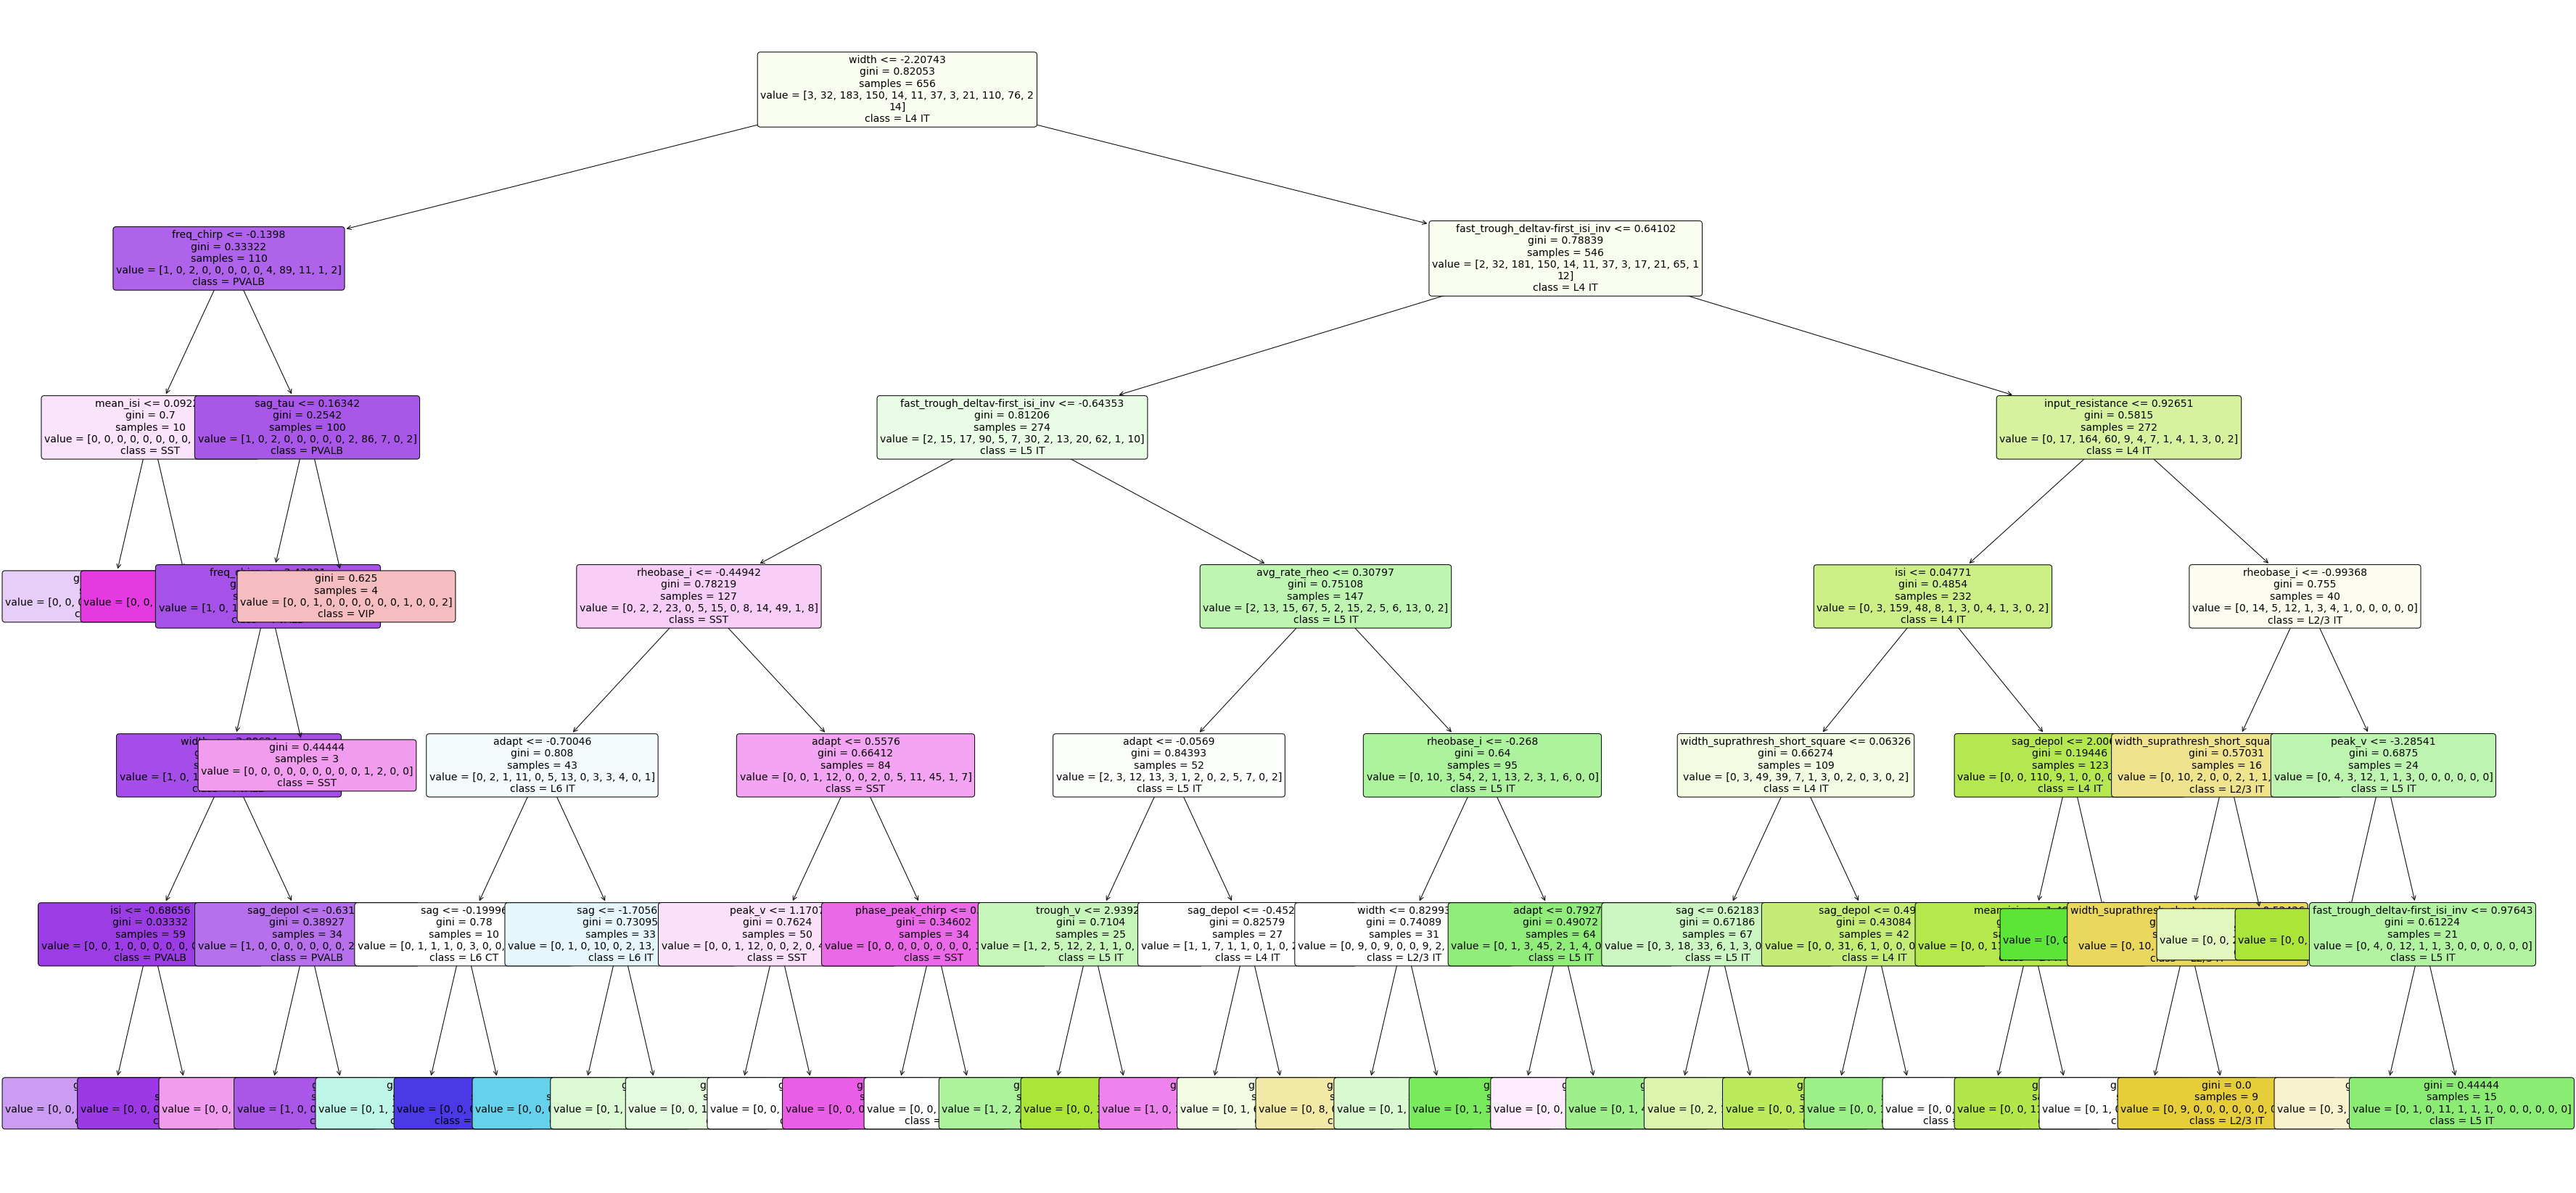

In [251]:
fig = plt.figure(figsize=(60,30))
clf2 = DecisionTreeClassifier(max_depth=6, min_samples_leaf = 2, min_samples_split = 7).fit(X,y)

class_names = clf2.classes_

_ = plot_tree(clf2, 
                   feature_names=feature_cols,
                   max_depth = 6,
                   filled=True,
                   fontsize = 14,
                   class_names = class_names,
                   #proportion=True
                   precision=5,
                   rounded=True)

fig.savefig("decision_tree_spca.png", dpi=300)
print(class_names)

[Text(0, 0, 'L2/3 IT'),
 Text(1, 0, 'L4 IT'),
 Text(2, 0, 'L5 IT'),
 Text(3, 0, 'L5 PT'),
 Text(4, 0, 'L5/6 NP'),
 Text(5, 0, 'L6 CT'),
 Text(6, 0, 'L6 IT'),
 Text(7, 0, 'L6b'),
 Text(8, 0, 'LAMP5/PAX6/Other'),
 Text(9, 0, 'PVALB'),
 Text(10, 0, 'Chandelier'),
 Text(11, 0, 'SST'),
 Text(12, 0, 'Sst Chodl'),
 Text(13, 0, 'VIP')]

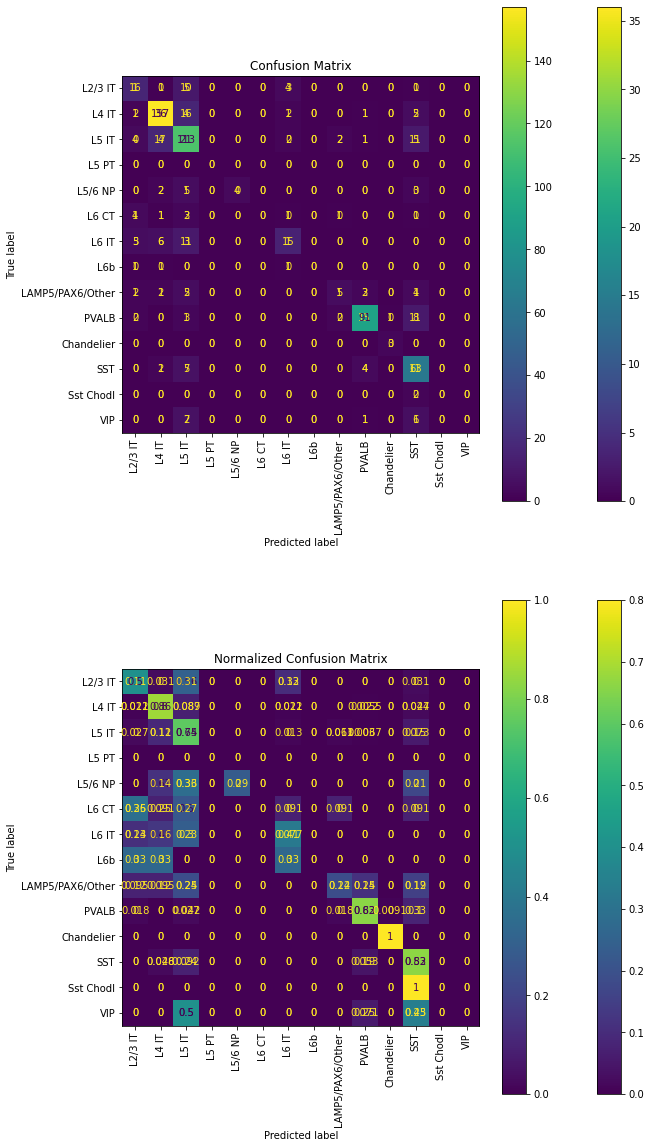

In [253]:
from sklearn.model_selection import train_test_split

fig, ax = plt.subplots(2,1, figsize=(10, 20))
ax[0].set_title('Confusion Matrix')

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

clf2 = DecisionTreeClassifier(max_depth=6, min_samples_leaf = 2, min_samples_split = 7)
clf2 = clf2.fit(X_train,y_train)

ConfusionMatrixDisplay.from_estimator(
    clf2, X_test, y_test, labels=['L2/3 IT', 'L4 IT', 'L5 IT', 'L5 PT', 'L5/6 NP',
       'L6 CT', 'L6 IT', 'L6b', 'LAMP5/PAX6/Other', 'PVALB', 'Chandelier', 'SST',
       'Sst Chodl', 'VIP'], ax=ax[0])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)


ax[1].set_title('Normalized Confusion Matrix')

ConfusionMatrixDisplay.from_estimator(
    clf2, X_test, y_test, labels=['L2/3 IT', 'L4 IT', 'L5 IT', 'L5 PT', 'L5/6 NP',
       'L6 CT', 'L6 IT', 'L6b', 'LAMP5/PAX6/Other', 'PVALB', 'Chandelier', 'SST',
       'Sst Chodl', 'VIP'], ax=ax[1], normalize ='true')

ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

ConfusionMatrixDisplay.from_estimator(
    clf2, X, y, labels=['L2/3 IT', 'L4 IT', 'L5 IT', 'L5 PT', 'L5/6 NP',
       'L6 CT', 'L6 IT', 'L6b', 'LAMP5/PAX6/Other', 'PVALB', 'Chandelier', 'SST',
       'Sst Chodl', 'VIP'], ax=ax[0])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)


ax[1].set_title('Normalized Confusion Matrix')

ConfusionMatrixDisplay.from_estimator(
    clf2, X, y, labels=['L2/3 IT', 'L4 IT', 'L5 IT', 'L5 PT', 'L5/6 NP',
       'L6 CT', 'L6 IT', 'L6b', 'LAMP5/PAX6/Other', 'PVALB', 'Chandelier', 'SST',
       'Sst Chodl', 'VIP'], ax=ax[1], normalize ='true')

ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

In [ ]:
from sklearn.metrics import classification_report
>>> y_true = [0, 1, 2, 2, 0]
>>> y_pred = [0, 0, 2, 1, 0]
>>> target_names = ['class 0', 'class 1', 'class 2']
>>> print(classification_report(y_true, y_pred, target_names=target_names))

In [340]:
fish_ovo = []
#for col in ary.T:
for col in range(X_transformed.shape[1]):
    vals = []
    for pop1 in np.unique(y):
        for pop2 in np.unique(y):
            if pop1 == pop2:
                continue
            elif (np.sum(y==pop1)<3) or (np.sum(y==pop2)<3):
                continue
            else:
                #print(f'{pop1} vs. {pop2}')
                vals.append(fisher_criterion (X_transformed[y==pop1,col], X_transformed[y==pop2,col]))
    
    fish_ovo.append(vals)
len(fish_ovo)

useful = []
i = 0
for feat in comp_names:
    if np.sum(np.array(fish_ovo[i])>1):      # TRY RAISING THIS THRESHOLD - was 2
        useful.append(True)
        print(feat)
    else:
        useful.append(False)
    i+=1
sum(useful)


width
fast_trough_deltav-first_isi_inv
input_resistance
avg_rate_rheo
freq_chirp
phase_peak_chirp
width_suprathresh_short_square
rheobase_i
sag
sag_tau
sag_tau_depol


11

In [175]:
Exc_subclasses = np.unique(df_ephys_sub1[df_ephys_sub1['broad_class_label']== 'Glutamatergic neuron']['subclass_label'])
Exc_inds = [label in Exc_subclasses for label in y]
#X_Exc = X_transformed[Exc_inds,:]
X_Exc = X_std[Exc_inds,:]

# After subsetting, sPC's work much worse than full data, so maybe you need to run PC's just on the subset of data?

0.6310663890816562
0.6371732593106638
0.6417418459403192
0.6280245200092528
0.6295512375665048
0.6295512375665048
0.6325815405968077
0.6310779551237566


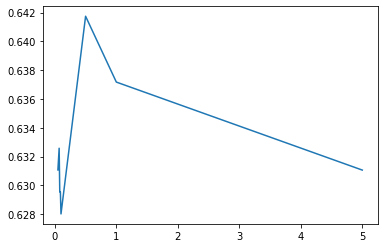

In [241]:
# Logistic regression with sPC's

from sklearn.model_selection import KFold

kf =KFold(n_splits=5, shuffle=True, random_state=1)

#X = X_transformed
#X = X_std
X = X_Exc
y_Exc = y[Exc_inds]
y_Exc.index = y.index[:len(y_Exc)]
C_list = [5.0, 1.0, 0.5, 0.1, 0.09, 0.08, 0.07, 0.05]
perc_corr_all = []

for c in C_list:
    perc_corr = []
    for train_index, test_index in kf.split(X, y):
        clf_lr = LogisticRegression(solver="lbfgs", multi_class='ovr', penalty = "l2", max_iter=10000, C=c).fit(X[train_index], y[train_index])
    
        #Predict the response for test dataset
        y_pred = clf_lr.predict(X[test_index])
    
        perc_corr.append(sum(y_pred==y[test_index])/len(y[test_index]))
    print(np.mean(perc_corr))
    perc_corr_all.append(np.mean(perc_corr))   
plt.plot(C_list, perc_corr_all)

[Text(0, 0, 'L2/3 IT'),
 Text(1, 0, 'L4 IT'),
 Text(2, 0, 'L5 IT'),
 Text(3, 0, 'L5 PT'),
 Text(4, 0, 'L5/6 NP'),
 Text(5, 0, 'L6 CT'),
 Text(6, 0, 'L6 IT'),
 Text(7, 0, 'L6b'),
 Text(8, 0, 'LAMP5/PAX6/Other'),
 Text(9, 0, 'PVALB'),
 Text(10, 0, 'Chandelier'),
 Text(11, 0, 'SST'),
 Text(12, 0, 'Sst Chodl'),
 Text(13, 0, 'VIP')]

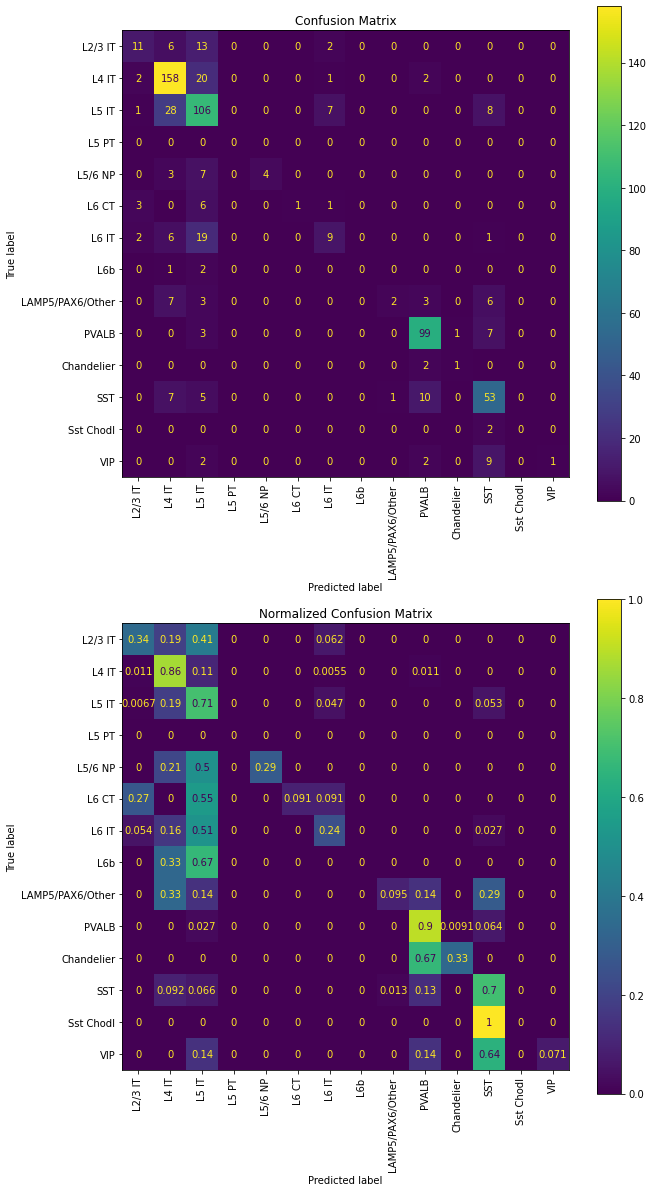

In [242]:
clf_lr = LogisticRegression(solver="lbfgs", multi_class='ovr', penalty = "l2", max_iter=10000, C=0.5).fit(X, y)

fig, ax = plt.subplots(2,1, figsize=(10, 20))
ax[0].set_title('Confusion Matrix')

ConfusionMatrixDisplay.from_estimator(
    clf_lr, X_transformed, y, labels=['L2/3 IT', 'L4 IT', 'L5 IT', 'L5 PT', 'L5/6 NP',
       'L6 CT', 'L6 IT', 'L6b', 'LAMP5/PAX6/Other', 'PVALB', 'Chandelier', 'SST',
       'Sst Chodl', 'VIP'], ax=ax[0])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)


ax[1].set_title('Normalized Confusion Matrix')

ConfusionMatrixDisplay.from_estimator(
    clf_lr, X_transformed, y, labels=['L2/3 IT', 'L4 IT', 'L5 IT', 'L5 PT', 'L5/6 NP',
       'L6 CT', 'L6 IT', 'L6b', 'LAMP5/PAX6/Other', 'PVALB', 'Chandelier', 'SST',
       'Sst Chodl', 'VIP'], ax=ax[1], normalize ='true')

ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

In [239]:
y_pred = clf_lr.predict(X[test_index])
sum(y_pred == "Chandelier")

0

[Text(0, 0, 'L2/3 IT'),
 Text(1, 0, 'L4 IT'),
 Text(2, 0, 'L5 IT'),
 Text(3, 0, 'L5 PT'),
 Text(4, 0, 'L5/6 NP'),
 Text(5, 0, 'L6 CT'),
 Text(6, 0, 'L6 IT'),
 Text(7, 0, 'L6b')]

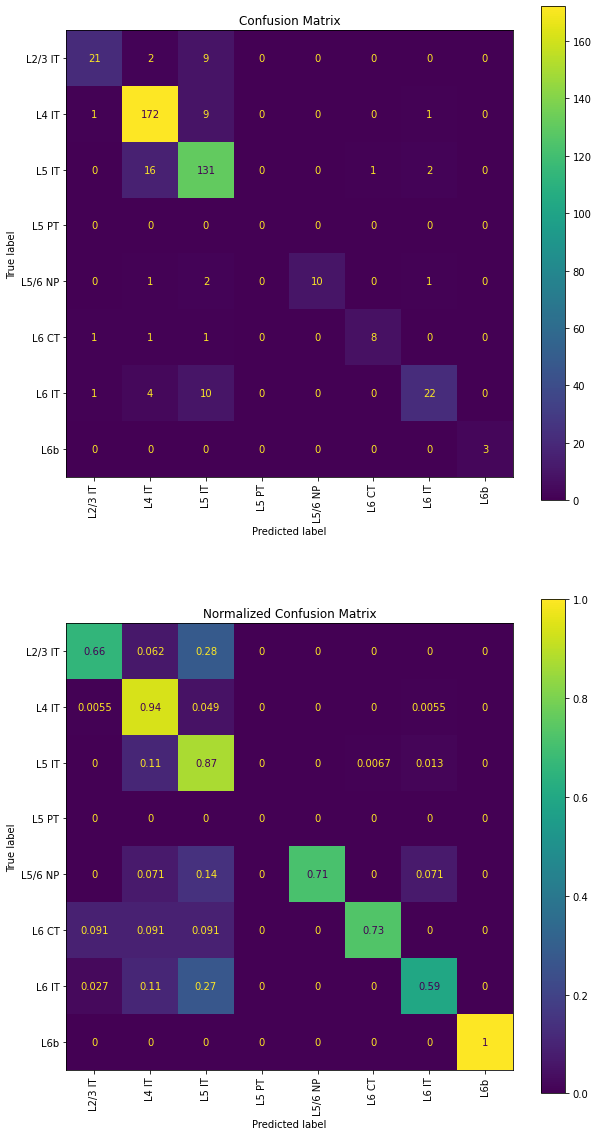

In [178]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(2,1, figsize=(10, 20))
ax[0].set_title('Confusion Matrix')

ConfusionMatrixDisplay.from_estimator(
    clf_lr, X_std, y, labels=['L2/3 IT', 'L4 IT', 'L5 IT', 'L5 PT', 'L5/6 NP',
       'L6 CT', 'L6 IT', 'L6b'], ax=ax[0])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)


ax[1].set_title('Normalized Confusion Matrix')

ConfusionMatrixDisplay.from_estimator(
    clf_lr, X_std, y, labels=['L2/3 IT', 'L4 IT', 'L5 IT', 'L5 PT', 'L5/6 NP',
       'L6 CT', 'L6 IT', 'L6b'], ax=ax[1], normalize ='true')

ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)

[Text(0, 0, 'L2/3 IT'),
 Text(1, 0, 'L4 IT'),
 Text(2, 0, 'L5 IT'),
 Text(3, 0, 'L5 PT'),
 Text(4, 0, 'L5/6 NP'),
 Text(5, 0, 'L6 CT'),
 Text(6, 0, 'L6 IT'),
 Text(7, 0, 'L6b'),
 Text(8, 0, 'LAMP5/PAX6/Other'),
 Text(9, 0, 'PVALB'),
 Text(10, 0, 'Chandelier'),
 Text(11, 0, 'SST'),
 Text(12, 0, 'Sst Chodl'),
 Text(13, 0, 'VIP')]

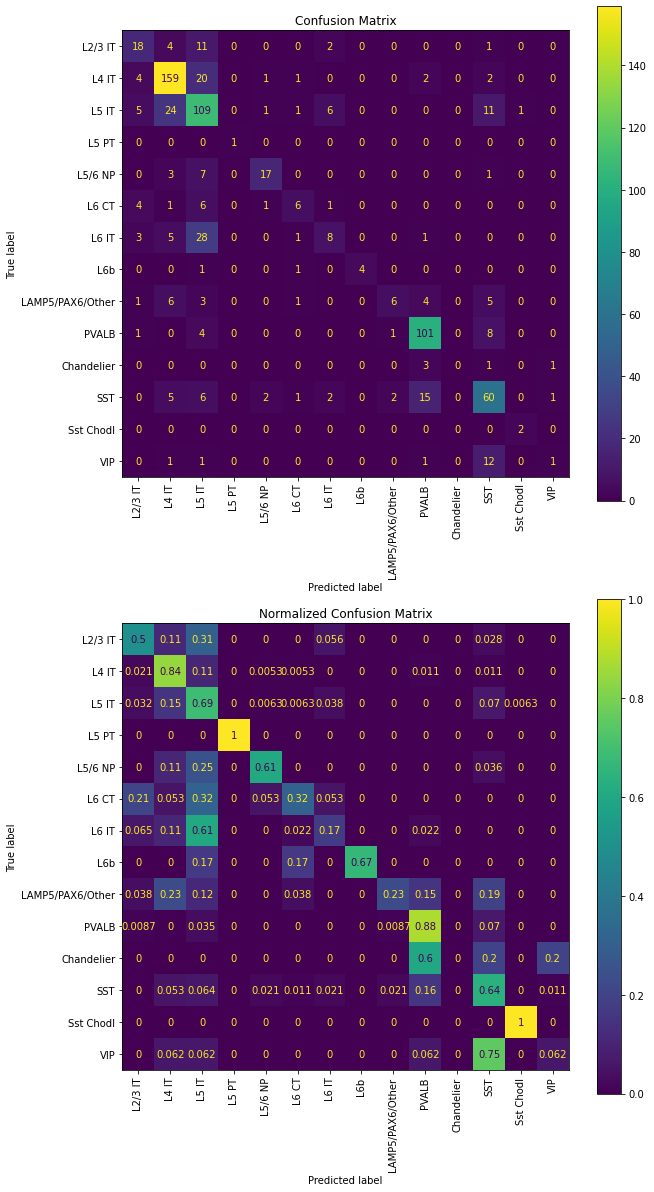

In [345]:
from sklearn.metrics import ConfusionMatrixDisplay

fig, ax = plt.subplots(2,1, figsize=(10, 20))
ax[0].set_title('Confusion Matrix')

ConfusionMatrixDisplay.from_estimator(
    clf_lr, X_transformed, y, labels=['L2/3 IT', 'L4 IT', 'L5 IT', 'L5 PT', 'L5/6 NP',
       'L6 CT', 'L6 IT', 'L6b', 'LAMP5/PAX6/Other', 'PVALB', 'Chandelier', 'SST',
       'Sst Chodl', 'VIP'], ax=ax[0])

ax[0].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)


ax[1].set_title('Normalized Confusion Matrix')

ConfusionMatrixDisplay.from_estimator(
    clf_lr, X_transformed, y, labels=['L2/3 IT', 'L4 IT', 'L5 IT', 'L5 PT', 'L5/6 NP',
       'L6 CT', 'L6 IT', 'L6b', 'LAMP5/PAX6/Other', 'PVALB', 'Chandelier', 'SST',
       'Sst Chodl', 'VIP'], ax=ax[1], normalize ='true')

ax[1].set_xticklabels(ax[0].get_xticklabels(), rotation = 90)


In [190]:
# Partial Least Squares

from sklearn.cross_decomposition import PLSRegression

y_temp = y_Exc
label_binarizer = LabelBinarizer().fit(y_temp)
y_onehot = label_binarizer.transform(y_temp)
#print(y_onehot.shape)  # (n_samples, n_classes)

kf =KFold(n_splits=5, shuffle=True, random_state=1)

perc_corr = []

#X = X_std
X_Exc = X_std[Exc_inds,:]
X = X_Exc
print(X_Exc.shape)
for train_index, test_index in kf.split(X, y_onehot):

    pls = PLSRegression(n_components=17)
    pls.fit(X[train_index,:], y_onehot[train_index,:])
    #y_pred = pls.predict(X[test_index])
    #print(y_pred[0,:])
    #y_pred = np.argmax(y_pred, axis=1)    # These results are particularly high valued for particular component columns
    X_t_train = pls.transform(X[train_index,:])
    X_t = pls.transform(X[test_index,:])
    clf = LinearDiscriminantAnalysis()
    clf.fit(X_t_train, y_temp[train_index])
    y_pred = clf.predict(X_t)    
    perc_corr.append(sum(y_pred==y_temp[test_index])/len(test_index))

print(np.mean(perc_corr))

# There exist problems if a matrix of y is used. This is also why PLSDA is not recommended for multiclass problem.
# https://stackoverflow.com/questions/18390150/pls-da-algorithm-in-python

#pls.transform(X) - see dim reduction

# Number of components to keep. Should be in [1, min(n_samples, n_features, n_targets)].

(430, 92)
0.6930232558139535


In [442]:
pls = PLSRegression(n_components=17)
pls.fit(X, y_onehot)
feat_names[pls.x_loadings_[:,0]>0.15]

Index(['upstroke_downstroke_ratio_short_square', 'downstroke_short_square',
       'upstroke_downstroke_ratio_rheo', 'width_rheo', 'downstroke_rheo',
       'width_suprathresh_rheo', 'upstroke_downstroke_ratio_hero',
       'width_hero', 'downstroke_hero', 'width_suprathresh_hero',
       'fast_trough_deltav_rheo', 'fast_trough_deltav_hero',
       'upstroke_downstroke_ratio_ramp', 'width_ramp', 'downstroke_ramp',
       'width_suprathresh_ramp', 'fast_trough_deltav_ramp'],
      dtype='object')

In [443]:
feat_names[pls.x_loadings_[:,1]>0.15]

Index(['postap_slope_rheo', 'postap_slope_hero', 'isi_adapt_ratio',
       'trough_slowdeltav_hero', 'fast_trough_deltav_rheo',
       'fast_trough_deltav_hero', 'first_isi_inv_rheo', 'first_isi_inv_hero',
       'postap_slope_ramp'],
      dtype='object')

In [ ]:
ALSO RUN ONE TO ONE

In [ ]:
Try louvain?